# <center> PHASE 2: ANSWER A MEANINGFUL QUESTIONS

# Import các thư viện cần thiết


In [ ]:
import requests
import json
import pandas as pd
import numpy as np
import time
import datetime
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc 2 file csv đã được tiền xử lý

In [ ]:
df_details = pd.read_csv('understat_per_game_preprocess.csv')
df_details

league  year h_a        xG       xGA      npxG     npxGA  deep  \
0      Bundesliga  2014   h  2.570120  1.198420  2.570120  1.198420     5   
1      Bundesliga  2014   a  1.503280  1.307950  1.503280  1.307950    10   
2      Bundesliga  2014   h  1.229870  0.310166  1.229870  0.310166    13   
3      Bundesliga  2014   a  1.035190  0.203118  1.035190  0.203118     6   
4      Bundesliga  2014   h  3.482860  0.402844  3.482860  0.402844    23   
...           ...   ...  ..       ...       ...       ...       ...   ...   
24575     Serie_A  2019   h  0.448154  2.587650  0.448154  1.826350     7   
24576     Serie_A  2019   a  1.699320  0.446679  0.938022  0.446679     5   
24577     Serie_A  2019   h  2.535110  0.959100  2.535110  0.959100     5   
24578     Serie_A  2019   a  2.247360  2.689270  2.247360  2.689270    11   
24579     Serie_A  2019   a  1.934840  1.554200  1.173540  1.554200     6   

       deep_allowed  scored  ...  ppda_coef  ppda_att ppda_def oppda_coef  \
0                 4       2  ...   9.625000       231       24  21.850000   
1                 1       1  ...   4.756098       195       41  17.695652   
2                 3       2  ...   5.060606       167       33  16.961538   
3                 2       0  ...   4.423077       115       26   9.446809   
4                 2       4  ...   4.250000       170       40  44.800000   
...             ...     ...  ...        ...       ...      ...        ...   
24575             6       1  ...  15.500000       310       20  19.600000   
24576             7       1  ...  12.650000       253       20  14.600000   
24577             7       3  ...  13.777778       248       18  12.888889   
24578            10       2  ...  25.454545       280       11  10.600000   
24579             6       2  ...  10.291667       247       24  16.750000   

       oppda_att  oppda_def           team   xG_diff  xGA_diff  xpts_diff  
0            437         20  Bayern Munich  0.570120  0.198420    -0.6514  
1            407         23  Bayern Munich  0.503280  0.307950     0.5143  
2            441         26  Bayern Munich -0.770130  0.310166    -0.8412  
3            444         47  Bayern Munich  1.035190  0.203118     1.1367  
4            448         10  Bayern Munich -0.517140  0.402844    -0.0713  
...          ...        ...            ...       ...       ...        ...  
24575        294         15          Lecce -0.551846 -0.412350     0.1597  
24576        292         20          Lecce  0.699320 -1.553321     2.4418  
24577        348         27          Lecce -0.464890 -0.040900    -0.5675  
24578        212         20          Lecce  0.247360 -0.310730     1.1019  
24579        268         16          Lecce -0.065160  0.554200    -1.2913  

[24580 rows x 26 columns]

In [ ]:
df_overview = pd.read_csv('understat.com_preprocess.csv')
df_overview

league  year  position                   team  matches  wins  draws  \
0    La_liga  2014         1              Barcelona       38    30      4   
1    La_liga  2014         2            Real Madrid       38    30      2   
2    La_liga  2014         3        Atletico Madrid       38    23      9   
3    La_liga  2014         4               Valencia       38    22     11   
4    La_liga  2014         5                Sevilla       38    23      7   
..       ...   ...       ...                    ...      ...   ...    ...   
679     RFPL  2019        12              PFC Sochi       30     8      9   
680     RFPL  2019        13              FK Akhmat       30     7     10   
681     RFPL  2019        14  Krylya Sovetov Samara       30     8      7   
682     RFPL  2019        15              FC Tambov       30     9      4   
683     RFPL  2019        16            FC Orenburg       30     7      6   

     loses  scored  missed  ...        xGA   xGA_diff      npxGA      npxGD  \
0        4     110      21  ...  28.444293   7.444293  24.727907  73.049305   
1        6     118      38  ...  42.607198   4.607198  38.890805  47.213090   
2        6      67      29  ...  29.069107   0.069107  26.839271  25.748737   
3        5      70      32  ...  39.392572   7.392572  33.446477  16.257501   
4        8      71      45  ...  47.862742   2.862742  41.916529  20.178070   
..     ...     ...     ...  ...        ...        ...        ...        ...   
679     13      40      39  ...  38.850259  -0.149741  32.780898  -0.096048   
680     13      27      46  ...  40.626196  -5.373804  38.363370 -10.495864   
681     15      33      40  ...  42.980693   2.980693  37.550114  -7.777201   
682     17      37      41  ...  39.747938  -1.252062  34.468003 -12.231948   
683     17      28      52  ...  37.169797 -14.830203  32.644130   0.201339   

     ppda_coef  oppda_coef  deep  deep_allowed     xpts  xpts_diff  
0     5.683535   16.367593   489           114  94.0813     0.0813  
1    10.209085   12.929510   351           153  81.7489   -10.2511  
2     8.982028    9.237091   197           123  73.1353    -4.8647  
3     8.709827    7.870225   203           172  63.7068   -13.2932  
4     8.276148    9.477805   305           168  67.3867    -8.6133  
..         ...         ...   ...           ...      ...        ...  
679  12.838079   10.562327   175           206  38.6587     5.6587  
680  11.199502   10.806357   124           206  36.5424     5.5424  
681  11.949903   10.080858   103           215  36.3363     5.3363  
682  14.666049    9.192768   150           270  29.2413    -1.7587  
683  12.830908    9.464581   153           215  39.2364    12.2364  

[684 rows x 24 columns]

## Merge data

In [ ]:
df_overview_position = df_overview[['team', 'year', 'league', 'position']]
merged_data = pd.merge(df_details, df_overview_position, on=['team', 'year', 'league'], how='left')
merged_data

league  year h_a        xG       xGA      npxG     npxGA  deep  \
0      Bundesliga  2014   h  2.570120  1.198420  2.570120  1.198420     5   
1      Bundesliga  2014   a  1.503280  1.307950  1.503280  1.307950    10   
2      Bundesliga  2014   h  1.229870  0.310166  1.229870  0.310166    13   
3      Bundesliga  2014   a  1.035190  0.203118  1.035190  0.203118     6   
4      Bundesliga  2014   h  3.482860  0.402844  3.482860  0.402844    23   
...           ...   ...  ..       ...       ...       ...       ...   ...   
24575     Serie_A  2019   h  0.448154  2.587650  0.448154  1.826350     7   
24576     Serie_A  2019   a  1.699320  0.446679  0.938022  0.446679     5   
24577     Serie_A  2019   h  2.535110  0.959100  2.535110  0.959100     5   
24578     Serie_A  2019   a  2.247360  2.689270  2.247360  2.689270    11   
24579     Serie_A  2019   a  1.934840  1.554200  1.173540  1.554200     6   

       deep_allowed  scored  ...  ppda_att  ppda_def oppda_coef oppda_att  \
0                 4       2  ...       231        24  21.850000       437   
1                 1       1  ...       195        41  17.695652       407   
2                 3       2  ...       167        33  16.961538       441   
3                 2       0  ...       115        26   9.446809       444   
4                 2       4  ...       170        40  44.800000       448   
...             ...     ...  ...       ...       ...        ...       ...   
24575             6       1  ...       310        20  19.600000       294   
24576             7       1  ...       253        20  14.600000       292   
24577             7       3  ...       248        18  12.888889       348   
24578            10       2  ...       280        11  10.600000       212   
24579             6       2  ...       247        24  16.750000       268   

       oppda_def           team   xG_diff  xGA_diff  xpts_diff  position  
0             20  Bayern Munich  0.570120  0.198420    -0.6514         1  
1             23  Bayern Munich  0.503280  0.307950     0.5143         1  
2             26  Bayern Munich -0.770130  0.310166    -0.8412         1  
3             47  Bayern Munich  1.035190  0.203118     1.1367         1  
4             10  Bayern Munich -0.517140  0.402844    -0.0713         1  
...          ...            ...       ...       ...        ...       ...  
24575         15          Lecce -0.551846 -0.412350     0.1597        18  
24576         20          Lecce  0.699320 -1.553321     2.4418        18  
24577         27          Lecce -0.464890 -0.040900    -0.5675        18  
24578         20          Lecce  0.247360 -0.310730     1.1019        18  
24579         16          Lecce -0.065160  0.554200    -1.2913        18  

[24580 rows x 27 columns]

# Correlation Matrix
Đầu tiên ta sẽ nhìn tổng thể về độ tương quan giữa các biến với nhau

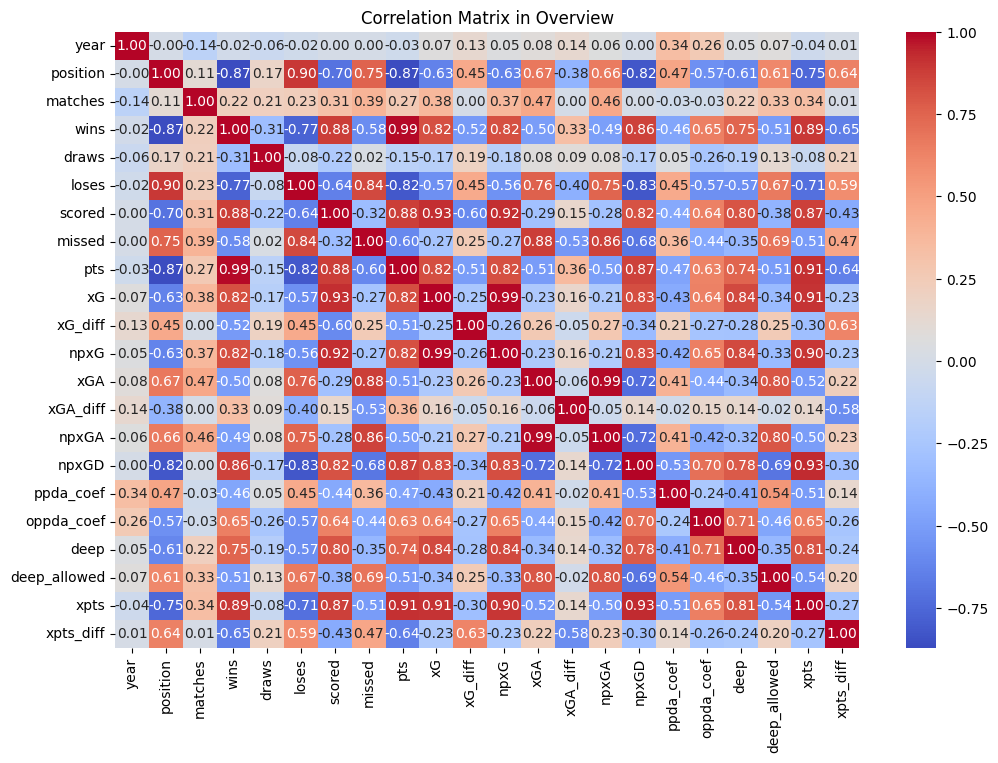

In [ ]:
correlation_matrix_overview = df_overview.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_overview, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix in Overview")
plt.show()

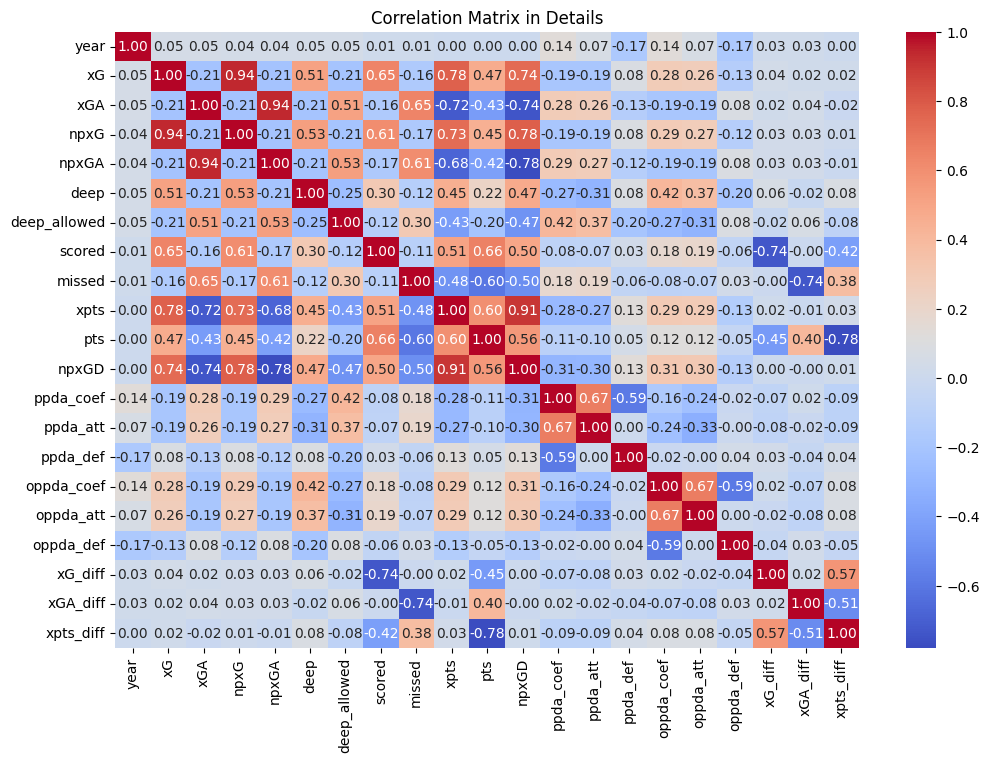

In [ ]:
correlation_matrix_details = df_details.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_details, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix in Details")
plt.show()

# Trả lời câu hỏi

## Câu 1: Có đội bóng nào cải thiện rõ rệt khi mùa giải tiến triển không?

**Ý nghĩa của câu hỏi**

Việc phân tích sự thay đổi của các đội bóng qua các mùa giải giúp đánh giá liệu đội bóng có đang cải thiện thành tích hay không. Điều này có thể thể hiện qua việc gia tăng số trận thắng, giảm số trận thua, hoặc tăng tổng điểm qua các năm.

Phân tích sự thay đổi có thể giúp nhận diện các yếu tố tác động đến thành tích của đội, chẳng hạn như thay đổi huấn luyện viên, chuyển nhượng cầu thủ, chiến thuật mới, hay sự thay đổi trong đội hình thi đấu.

**Lợi ích khi trả lời câu hỏi**

Phân tích sự thay đổi qua các mùa giải giúp đánh giá hiệu quả của các chiến lược quản lý, huấn luyện, và các quyết định về chuyển nhượng. Nếu đội bóng cải thiện qua các năm, có thể kết luận rằng các chiến lược và quyết định đúng đắn đã được thực hiện.


Để trả lời cho câu hỏi này ta sẽ dựa trên pts đã được tính bằng công thức

**pts = 3 x Wins + 1 x Draws + 0 x Losses**

Trong đó:
- Mỗi trận thắng được tính 3 điểm.
- Mỗi trận hòa được tính 1 điểm.
- Mỗi trận thua không tính điểm (0 điểm).
Dựa trên công thức này, số trận thắng (Wins) có ảnh hưởng lớn nhất đến tổng điểm, vì mỗi trận thắng mang lại 3 điểm. Số trận hòa (Draws) cũng đóng góp vào tổng điểm nhưng ít hơn, chỉ 1 điểm cho mỗi trận hòa. Còn số trận thua (Losses) không có ảnh hưởng đến tổng điểm, vì không tính điểm cho các trận thua.

Đầu tiên ta sẽ Sort dataframe theo thứ tự Năm

In [ ]:
team_points_by_season = df_details.groupby(['year', 'team'])['pts'].sum().reset_index()
team_points_by_season

year                     team  pts
0    2014                 AC Milan   52
1    2014                  Almeria   32
2    2014                    Amkar   32
3    2014                  Arsenal   75
4    2014             Arsenal Tula   25
..    ...                      ...  ...
679  2019            Werder Bremen   31
680  2019                 West Ham   39
681  2019                Wolfsburg   49
682  2019  Wolverhampton Wanderers   59
683  2019     Zenit St. Petersburg   72

[684 rows x 3 columns]

Để rõ ràng hơn, ta sẽ sort theo tên đội qua các năm

In [ ]:
team_points_by_team = df_details.groupby(['team', 'year'])['pts'].sum().reset_index()
team_points_by_team

team  year  pts
0                AC Milan  2014   52
1                AC Milan  2015   57
2                AC Milan  2016   63
3                AC Milan  2017   64
4                AC Milan  2018   68
..                    ...   ...  ...
679  Zenit St. Petersburg  2015   59
680  Zenit St. Petersburg  2016   61
681  Zenit St. Petersburg  2017   53
682  Zenit St. Petersburg  2018   64
683  Zenit St. Petersburg  2019   72

[684 rows x 3 columns]

<ipython-input-9-c2eefa75acbc>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


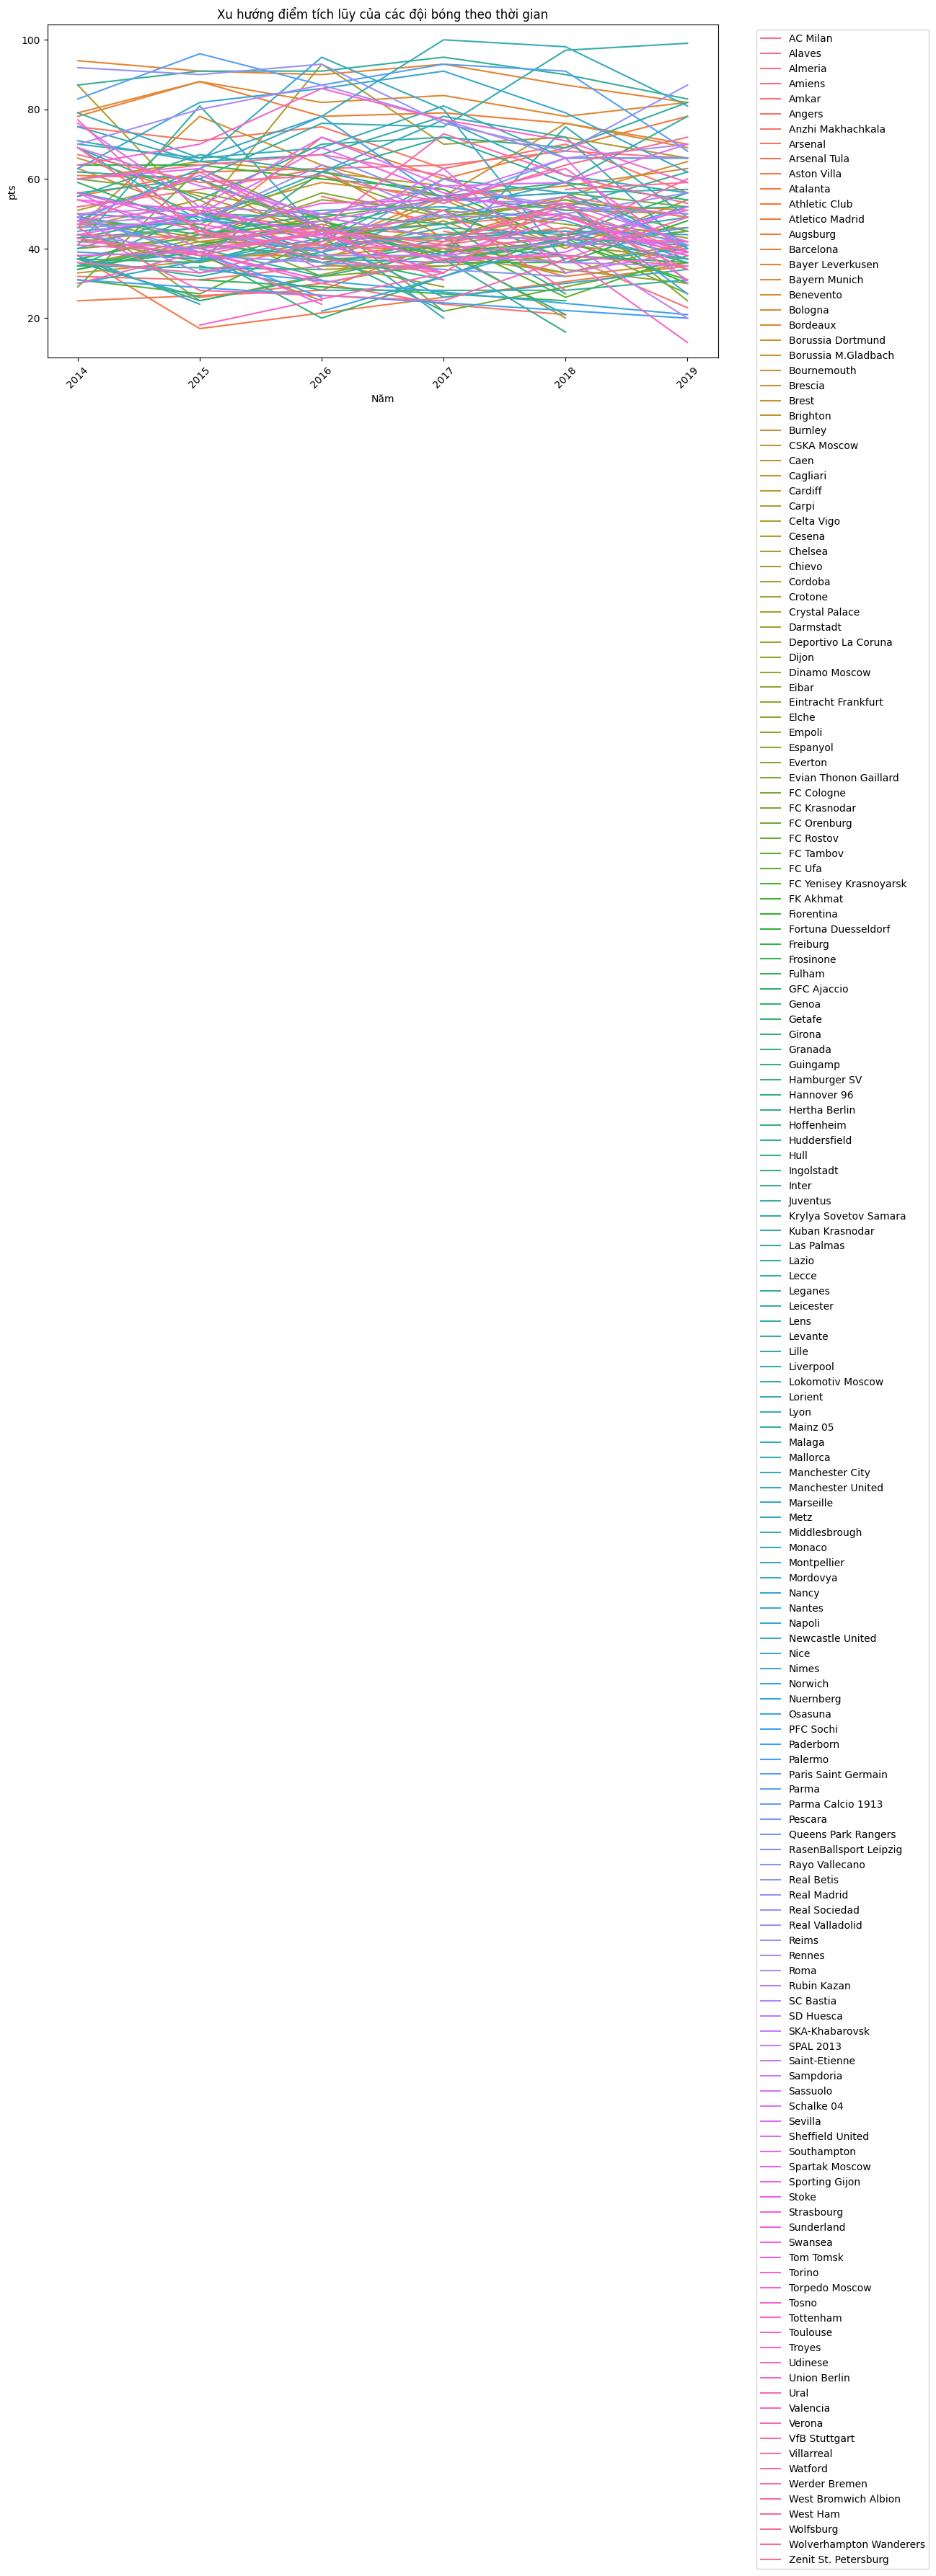

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=team_points_by_team, x='year', y='pts', hue='team')
plt.title('Xu hướng điểm tích lũy của các đội bóng theo thời gian')
plt.xlabel('Năm')
plt.ylabel('pts')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Nhận xét**
- Các đội bóng mạnh thường xuyên đạt số điểm tích lũy cao hơn (tiệm cận 100 điểm), trong khi nhiều đội bóng trung bình hoặc yếu có điểm tích lũy dưới 40 điểm.
- Đội mạnh (điểm cao): Những đội như Barcelona, Real Madrid, Manchester City, Bayern Munich, Juventus thường duy trì điểm số tích lũy gần tối đa mỗi mùa.
- Đội trung bình (điểm từ 40-60): Đây là nhóm đông đảo nhất, phản ánh sự cạnh tranh quyết liệt ở giữa bảng xếp hạng.
- Đội yếu (điểm dưới 40): Một số đội có xu hướng tích lũy điểm thấp hơn đáng kể, có thể liên quan đến việc xuống hạng hoặc chiến thuật không hiệu quả.


## Câu 2: Hiệu số kỳ vọng bàn thắng (xG) và bàn thua (xGA) có tương quan thế nào với kết quả trận đấu (thắng, hòa, thua)?

**Ý nghĩa của câu hỏi**

Câu hỏi này tìm hiểu mối liên hệ giữa hiệu số kỳ vọng bàn thắng (xG - xGA) và kết quả trận đấu (thắng, hòa, thua). Điều này giúp khám phá xem các chỉ số bàn thắng kỳ vọng (xG) và bàn thua kỳ vọng (xGA) có thể dự đoán kết quả của trận đấu một cách chính xác hay không.

- Hiệu số xG > 0: Nếu một đội có số bàn thắng kỳ vọng cao hơn số bàn thua kỳ vọng, điều này liệu có đồng nghĩa với khả năng cao đội đó sẽ thắng trận?
- Hiệu số xG ≈ 0: Với các trận đấu mà hiệu số kỳ vọng gần bằng 0, liệu điều này có dẫn đến kết quả hòa không?
- Hiệu số xG < 0: Liệu việc để đối thủ tạo ra nhiều cơ hội nguy hiểm hơn (xGA cao) có luôn dẫn đến thất bại không?

**Lợi ích khi trả lời câu hỏi**
- Hiểu rõ hơn về chiến thuật và hiệu quả thi đấu: Một đội có thể tạo ra nhiều cơ hội (xG cao) nhưng vẫn không thắng trận. Điều này phản ánh vấn đề về hiệu quả dứt điểm, chiến thuật, hoặc khả năng phòng ngự yếu kém (xGA cao). Ngược lại, nếu một đội có xG thấp nhưng vẫn thường thắng, điều này có thể phản ánh lối chơi thực dụng, tối ưu hóa cơ hội ít ỏi.
- Huấn luyện viên có thể sử dụng thông tin này để điều chỉnh chiến thuật, cải thiện khâu tấn công (tăng xG) hoặc phòng ngự (giảm xGA) nhằm tăng khả năng giành chiến thắng.
- Với những người theo dõi hoặc đặt cược bóng đá, việc hiểu mối quan hệ giữa xG, xGA và kết quả trận đấu có thể giúp đưa ra dự đoán chính xác hơn.

### Trực quan bằng boxplot với xGA

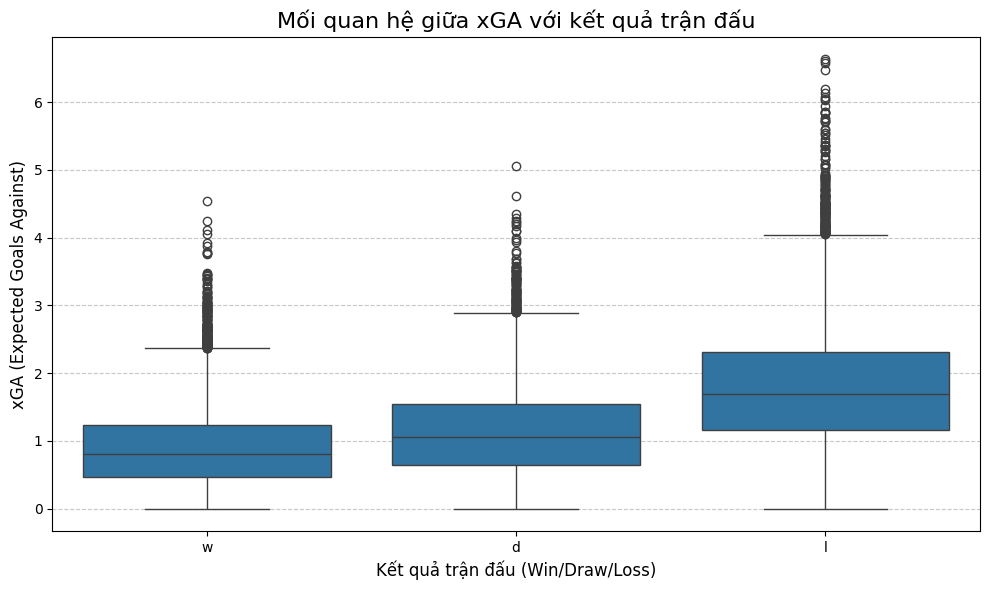

result
d    1.159281
l    1.805460
w    0.915448
Name: xGA, dtype: float64

In [ ]:
xga_correlation_summary = df_details.groupby("result")["xGA"].mean()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_details, x="result", y="xGA", legend = False)
plt.title("Mối quan hệ giữa xGA với kết quả trận đấu", fontsize=16)
plt.xlabel("Kết quả trận đấu (Win/Draw/Loss)", fontsize=12)
plt.ylabel("xGA (Expected Goals Against)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

xga_correlation_summary

### Trực quan bằng boxplot với xG

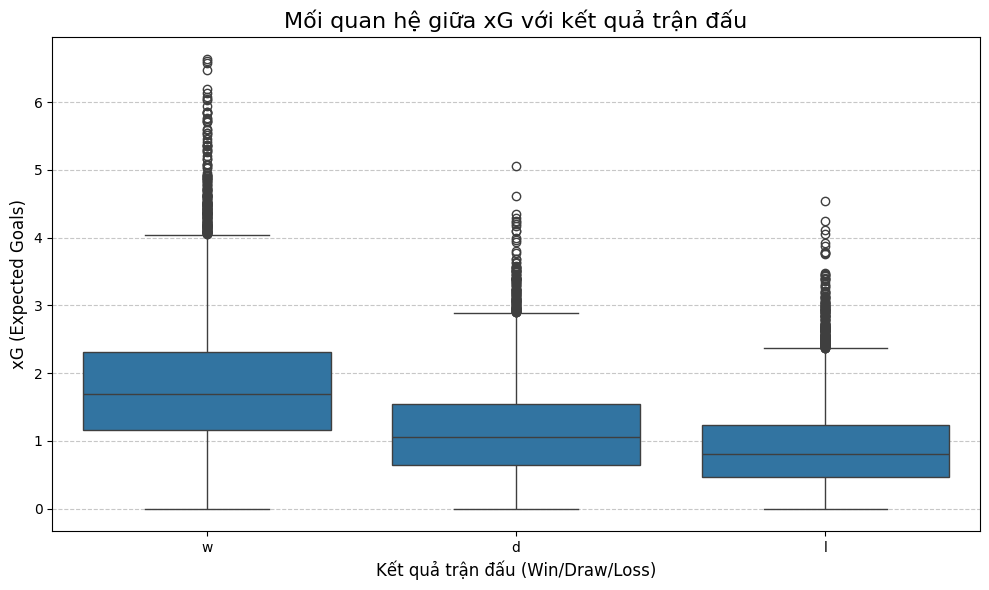

result
d    1.159281
l    0.915448
w    1.805460
Name: xG, dtype: float64

In [ ]:
xg_correlation_summary = df_details.groupby("result")["xG"].mean()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_details, x="result", y="xG", legend = False)
plt.title("Mối quan hệ giữa xG với kết quả trận đấu", fontsize=16)
plt.xlabel("Kết quả trận đấu (Win/Draw/Loss)", fontsize=12)
plt.ylabel("xG (Expected Goals)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

xg_correlation_summary


**Nhận xét**

1. Đối với xGA (Expected Goals Against) và kết quả trận đấu:
- Trận thua (l): Trung bình xGA cao nhất (1.805), cho thấy các đội thua thường để đối phương tạo ra nhiều cơ hội ghi bàn hơn kỳ vọng.
- Trận hòa (d): Trung bình xGA trung bình (1.159), gần như cân bằng. Điều này phản ánh cả hai đội có khả năng phòng ngự tương đương hoặc trận đấu có ít cơ hội ghi bàn rõ ràng.
- Trận thắng (w): Trung bình xGA thấp nhất (0.915), cho thấy các đội thắng thường kiểm soát tốt và giảm thiểu cơ hội ghi bàn của đối thủ.

2. Đối với xG (Expected Goals) và kết quả trận đấu:
- Trận thắng (w): Trung bình xG cao nhất (1.805), cho thấy các đội thắng thường tạo ra nhiều cơ hội ghi bàn rõ ràng hơn.
- Trận hòa (d): Trung bình xG ở mức trung bình (1.159), cho thấy hai đội có cơ hội tương đương và không thể chuyển hóa thành lợi thế cụ thể.
- Trận thua (l): Trung bình xG thấp nhất (0.915), cho thấy các đội thua thường tạo ra ít cơ hội ghi bàn rõ ràng hơn.


**Tương quan giữa xG và kết quả trận đấu: Chỉ số xG có mối quan hệ thuận chiều với kết quả trận đấu. Khi xG cao, cơ hội thắng trận lớn hơn do đội bóng tạo ra nhiều cơ hội rõ ràng. Ngược lại, xG thấp dẫn đến khả năng thất bại cao hơn.**

**Tương quan giữa xGA và kết quả trận đấu: Chỉ số xGA có mối quan hệ ngược chiều với kết quả trận đấu. Khi xGA thấp, khả năng thắng trận cao hơn vì đội bóng kiểm soát và hạn chế cơ hội của đối phương. Ngược lại, xGA cao phản ánh sự yếu kém trong phòng ngự, dẫn đến thất bại.**

## Câu 3: Có sự khác biệt đáng kể nào về hiệu suất (xG, xGA, pts) giữa các trận sân nhà và sân khách không?


**Ý nghĩa của câu hỏi**

Câu hỏi này nhằm khám phá sự khác biệt về hiệu suất của các đội bóng khi thi đấu trên sân nhà và sân khách, thông qua các chỉ số quan trọng như:

- xG (Expected Goals): Đo lường khả năng tấn công của đội, chỉ ra xem đội có tạo ra nhiều cơ hội hơn trên sân nhà hay sân khách không.
- xGA (Expected Goals Against): Đánh giá khả năng phòng ngự của đội, liệu đội có để đối phương tạo ra nhiều cơ hội hơn trên sân khách hay không.
- pts (Points): Điểm số thực tế đạt được, phản ánh kết quả cụ thể của các trận đấu (thắng, hòa, thua).

**Lợi ích khi trả lời câu hỏi**
- Hiểu rõ lợi thế sân nhà (Home Advantage):
Nếu xG và pts cao hơn trên sân nhà: Điều này cho thấy lợi thế sân nhà giúp đội bóng tấn công hiệu quả và đạt kết quả tốt hơn.
Nếu xGA thấp hơn trên sân nhà: Đội phòng ngự tốt hơn khi có sự hỗ trợ của khán giả và quen thuộc với điều kiện sân đấu.
- Phân tích hiệu suất sân khách: Nếu hiệu suất trên sân khách (xG, xGA, pts) thấp: Đội có thể cần điều chỉnh chiến thuật để cải thiện khả năng thi đấu xa nhà. Nếu hiệu suất trên sân khách không giảm nhiều so với sân nhà: Đội bóng có sự ổn định và linh hoạt khi thi đấu trong các môi trường khác nhau.
- Cải thiện chiến thuật: Phát hiện những vấn đề cụ thể khi đội thi đấu trên sân khách (ví dụ: tạo ít cơ hội hoặc phòng ngự kém).
- Tăng cường các yếu tố giúp đội phát huy lợi thế sân nhà, như tận dụng sự cổ vũ của khán giả, kiểm soát bóng tốt hơn.
- Đối với HLV: Phân tích này giúp điều chỉnh chiến thuật, lựa chọn đội hình phù hợp với bối cảnh sân nhà và sân khách.
- Đối với CLB: Hiểu rõ các yếu tố góp phần vào hiệu suất có thể giúp cải thiện các khía cạnh như hậu cần (di chuyển, nghỉ ngơi) và tâm lý cầu thủ.


### Trực quan tổng thể các chỉ số dựa trên sân nhà và sân khách

In [ ]:
home_away_df_details = df_details[["h_a", "xG", "xGA", "pts", "team"]].dropna()
home_away_df_details["location"] = home_away_df_details["h_a"].map({"h": "Sân nhà", "a": "Sân khách"})

avg_stats_by_location = home_away_df_details.groupby("location")[["xG", "xGA", "pts"]].mean()
avg_stats_by_location.columns = ["Trung bình xG", "Trung bình xGA", "Trung bình Points"]
avg_stats_by_location

Trung bình xG  Trung bình xGA  Trung bình Points
location                                                   
Sân khách       1.138014        1.481374           1.145484
Sân nhà         1.481374        1.138014           1.602197

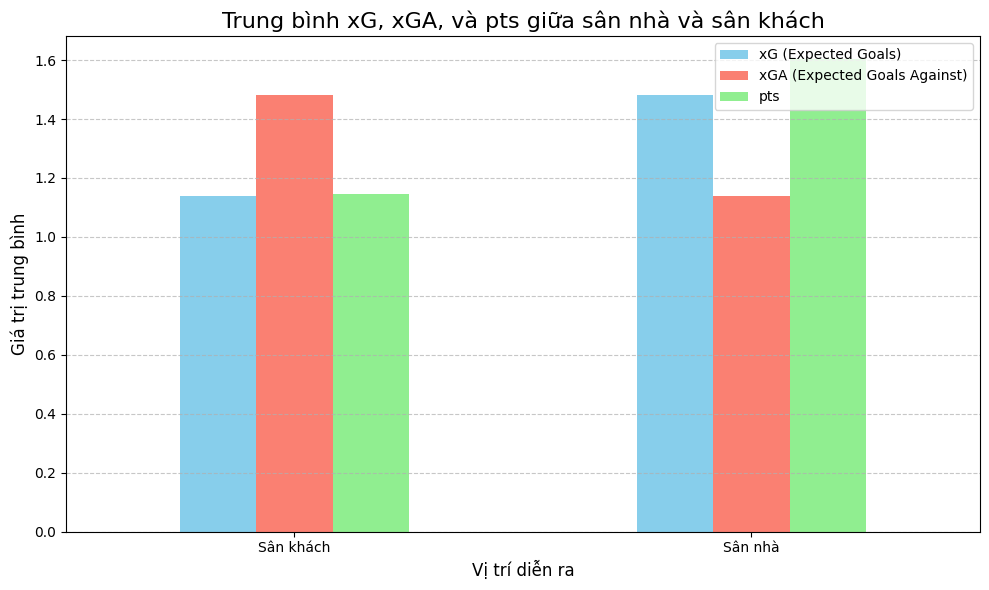

In [ ]:
avg_stats_by_location.plot(kind="bar", figsize=(10, 6), color=["skyblue", "salmon", "lightgreen"])
plt.title("Trung bình xG, xGA, và pts giữa sân nhà và sân khách", fontsize=16)
plt.ylabel("Giá trị trung bình", fontsize=12)
plt.xlabel("Vị trí diễn ra", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(["xG (Expected Goals)", "xGA (Expected Goals Against)", "pts"], fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Nhận xét**

Biểu đồ trên cho thấy lợi thế sân nhà đóng vai trò quan trọng trong bóng đá. Các đội bóng thường có xu hướng thi đấu tốt hơn, giành được nhiều điểm số hơn khi được chơi trên sân nhà. Để tận dụng tối đa lợi thế này, các đội bóng cần có sự chuẩn bị kỹ lưỡng, xây dựng lối chơi phù hợp và tạo ra một bầu không khí thi đấu sôi động trên sân nhà.

###Trực quan hiệu suất của từng đội theo từng trận sân nhà và sân khách

In [ ]:
home_away_performance = df_details.groupby(['team', 'h_a'])[['xG', 'xGA', 'pts']].mean().reset_index()

#### xG trung bình giữa sân nhà và sân khách

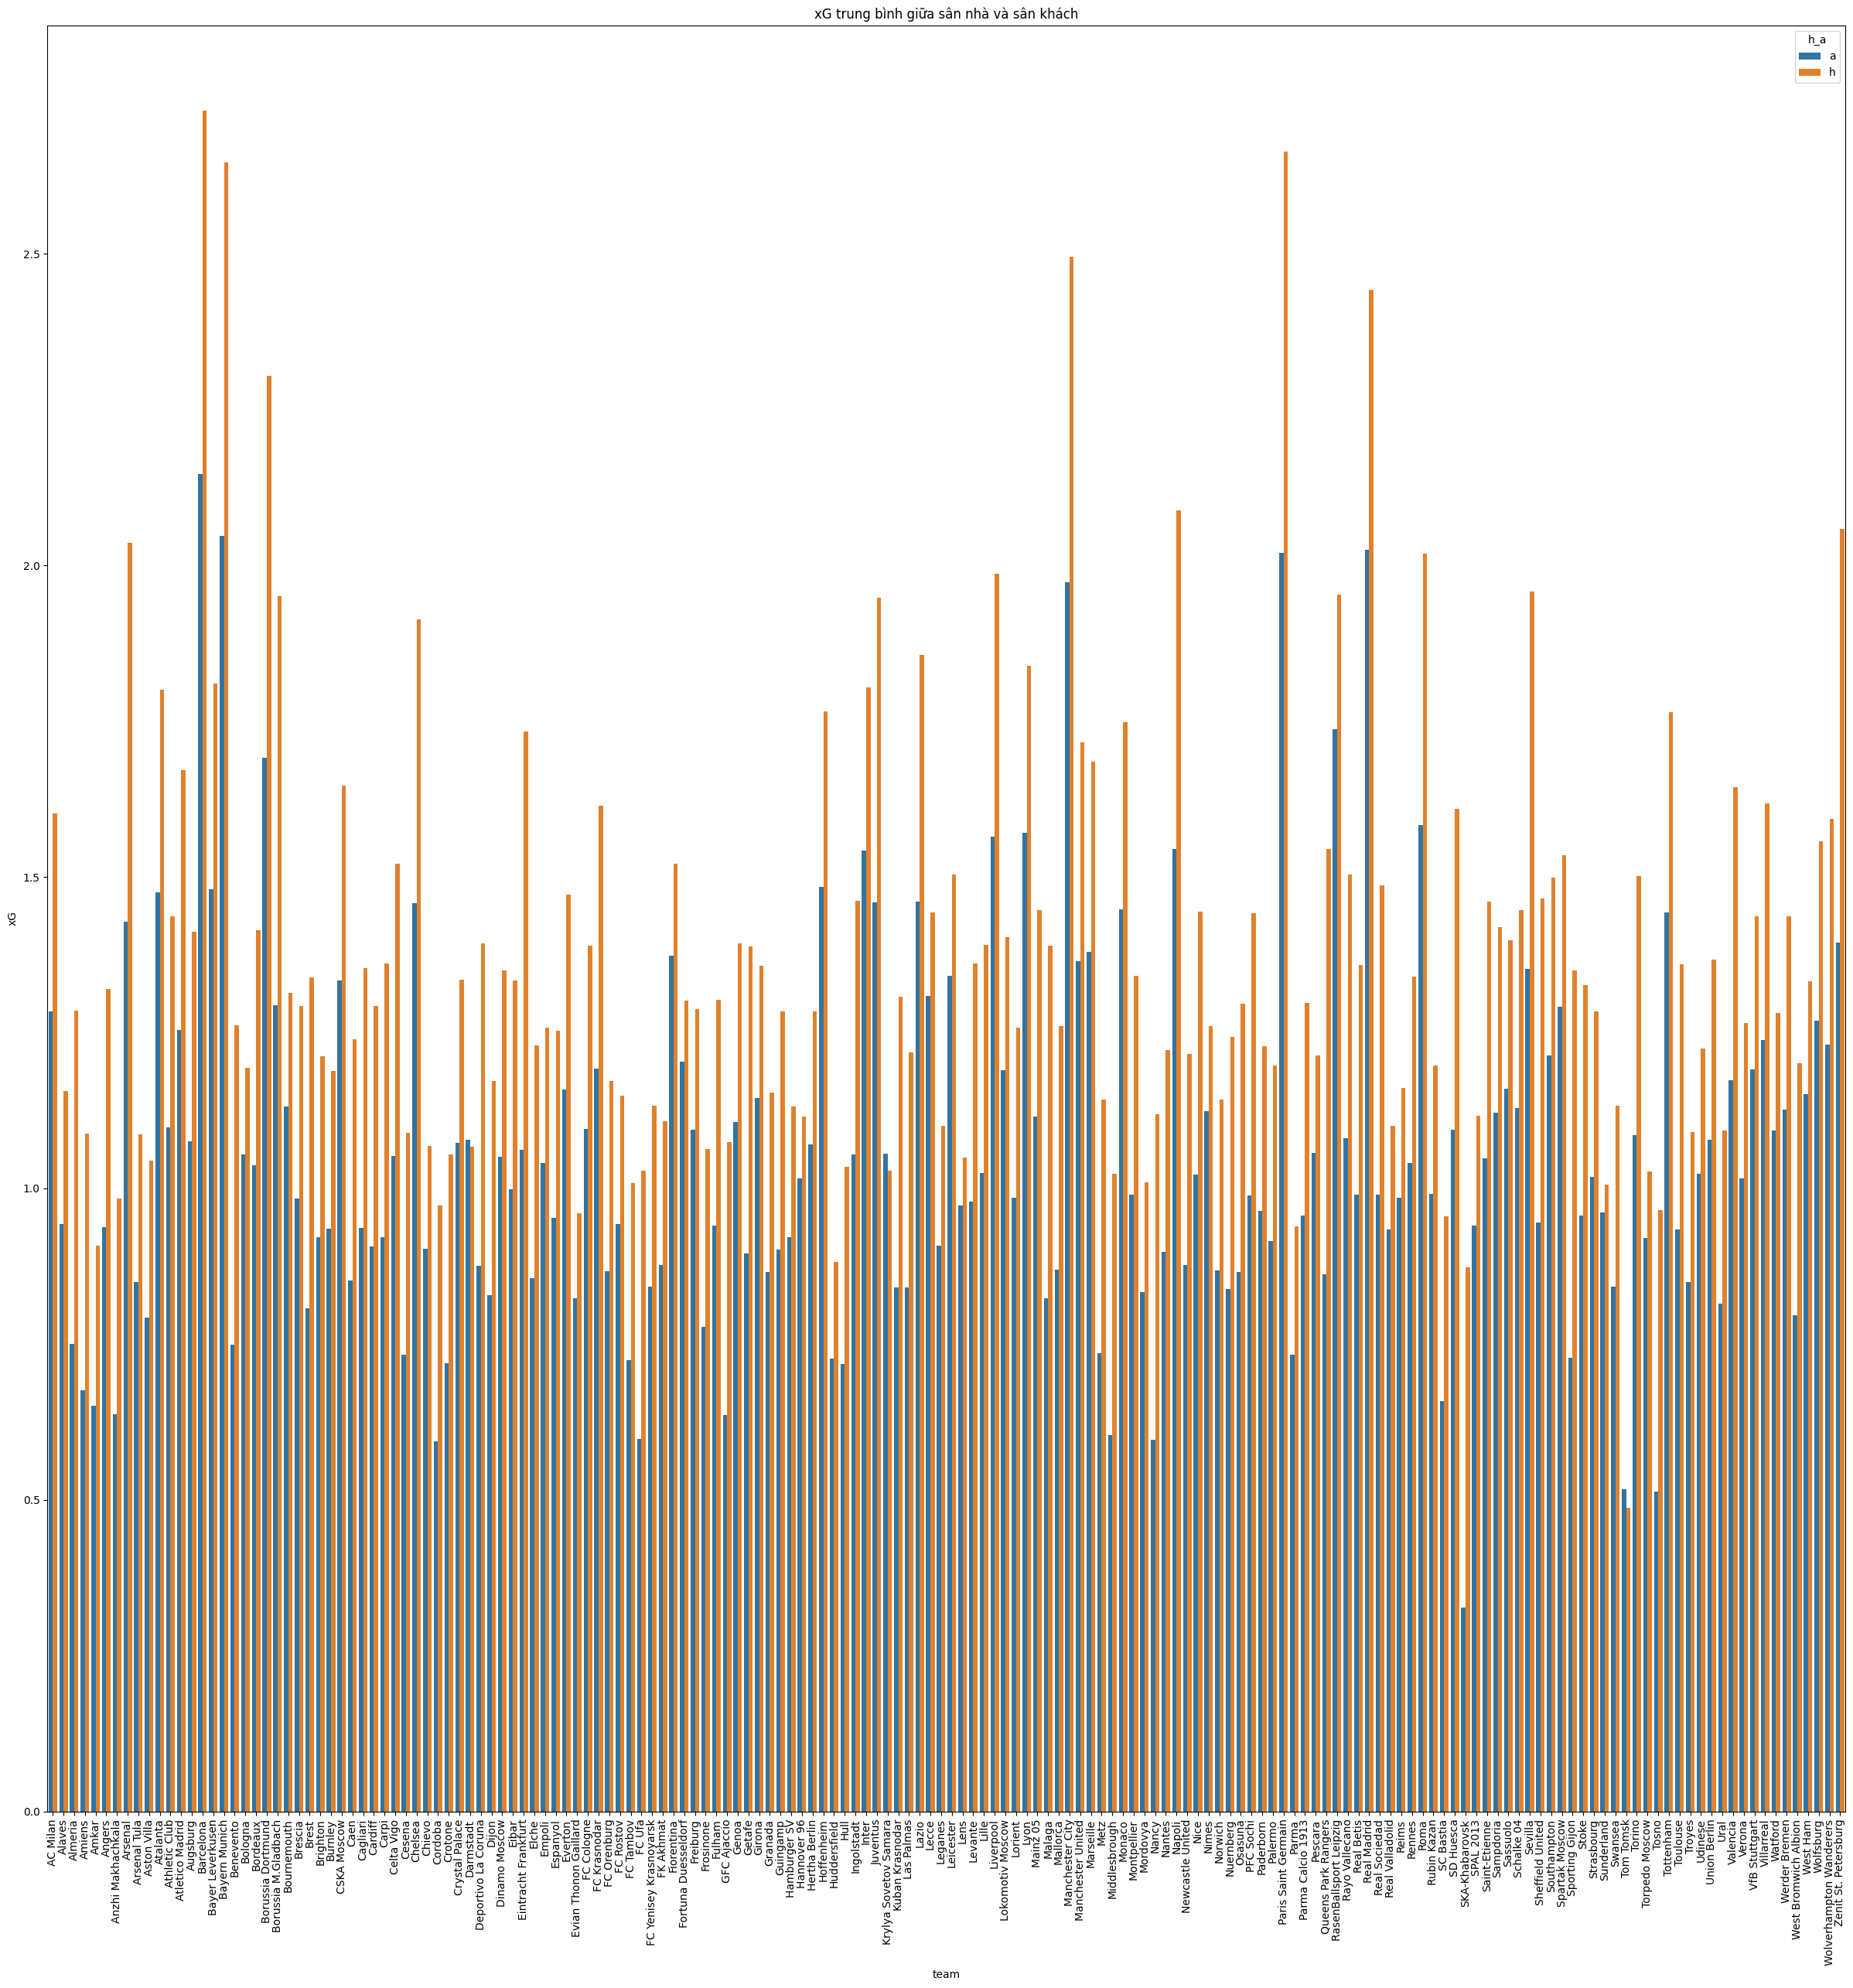

In [ ]:
plt.figure(figsize=(30, 30))
sns.barplot(x='team', y='xG', hue='h_a', data=home_away_performance)
plt.title('xG trung bình giữa sân nhà và sân khách')
plt.xticks(rotation=90)
plt.show()

#### xGA trung bình giữa sân nhà và sân khách

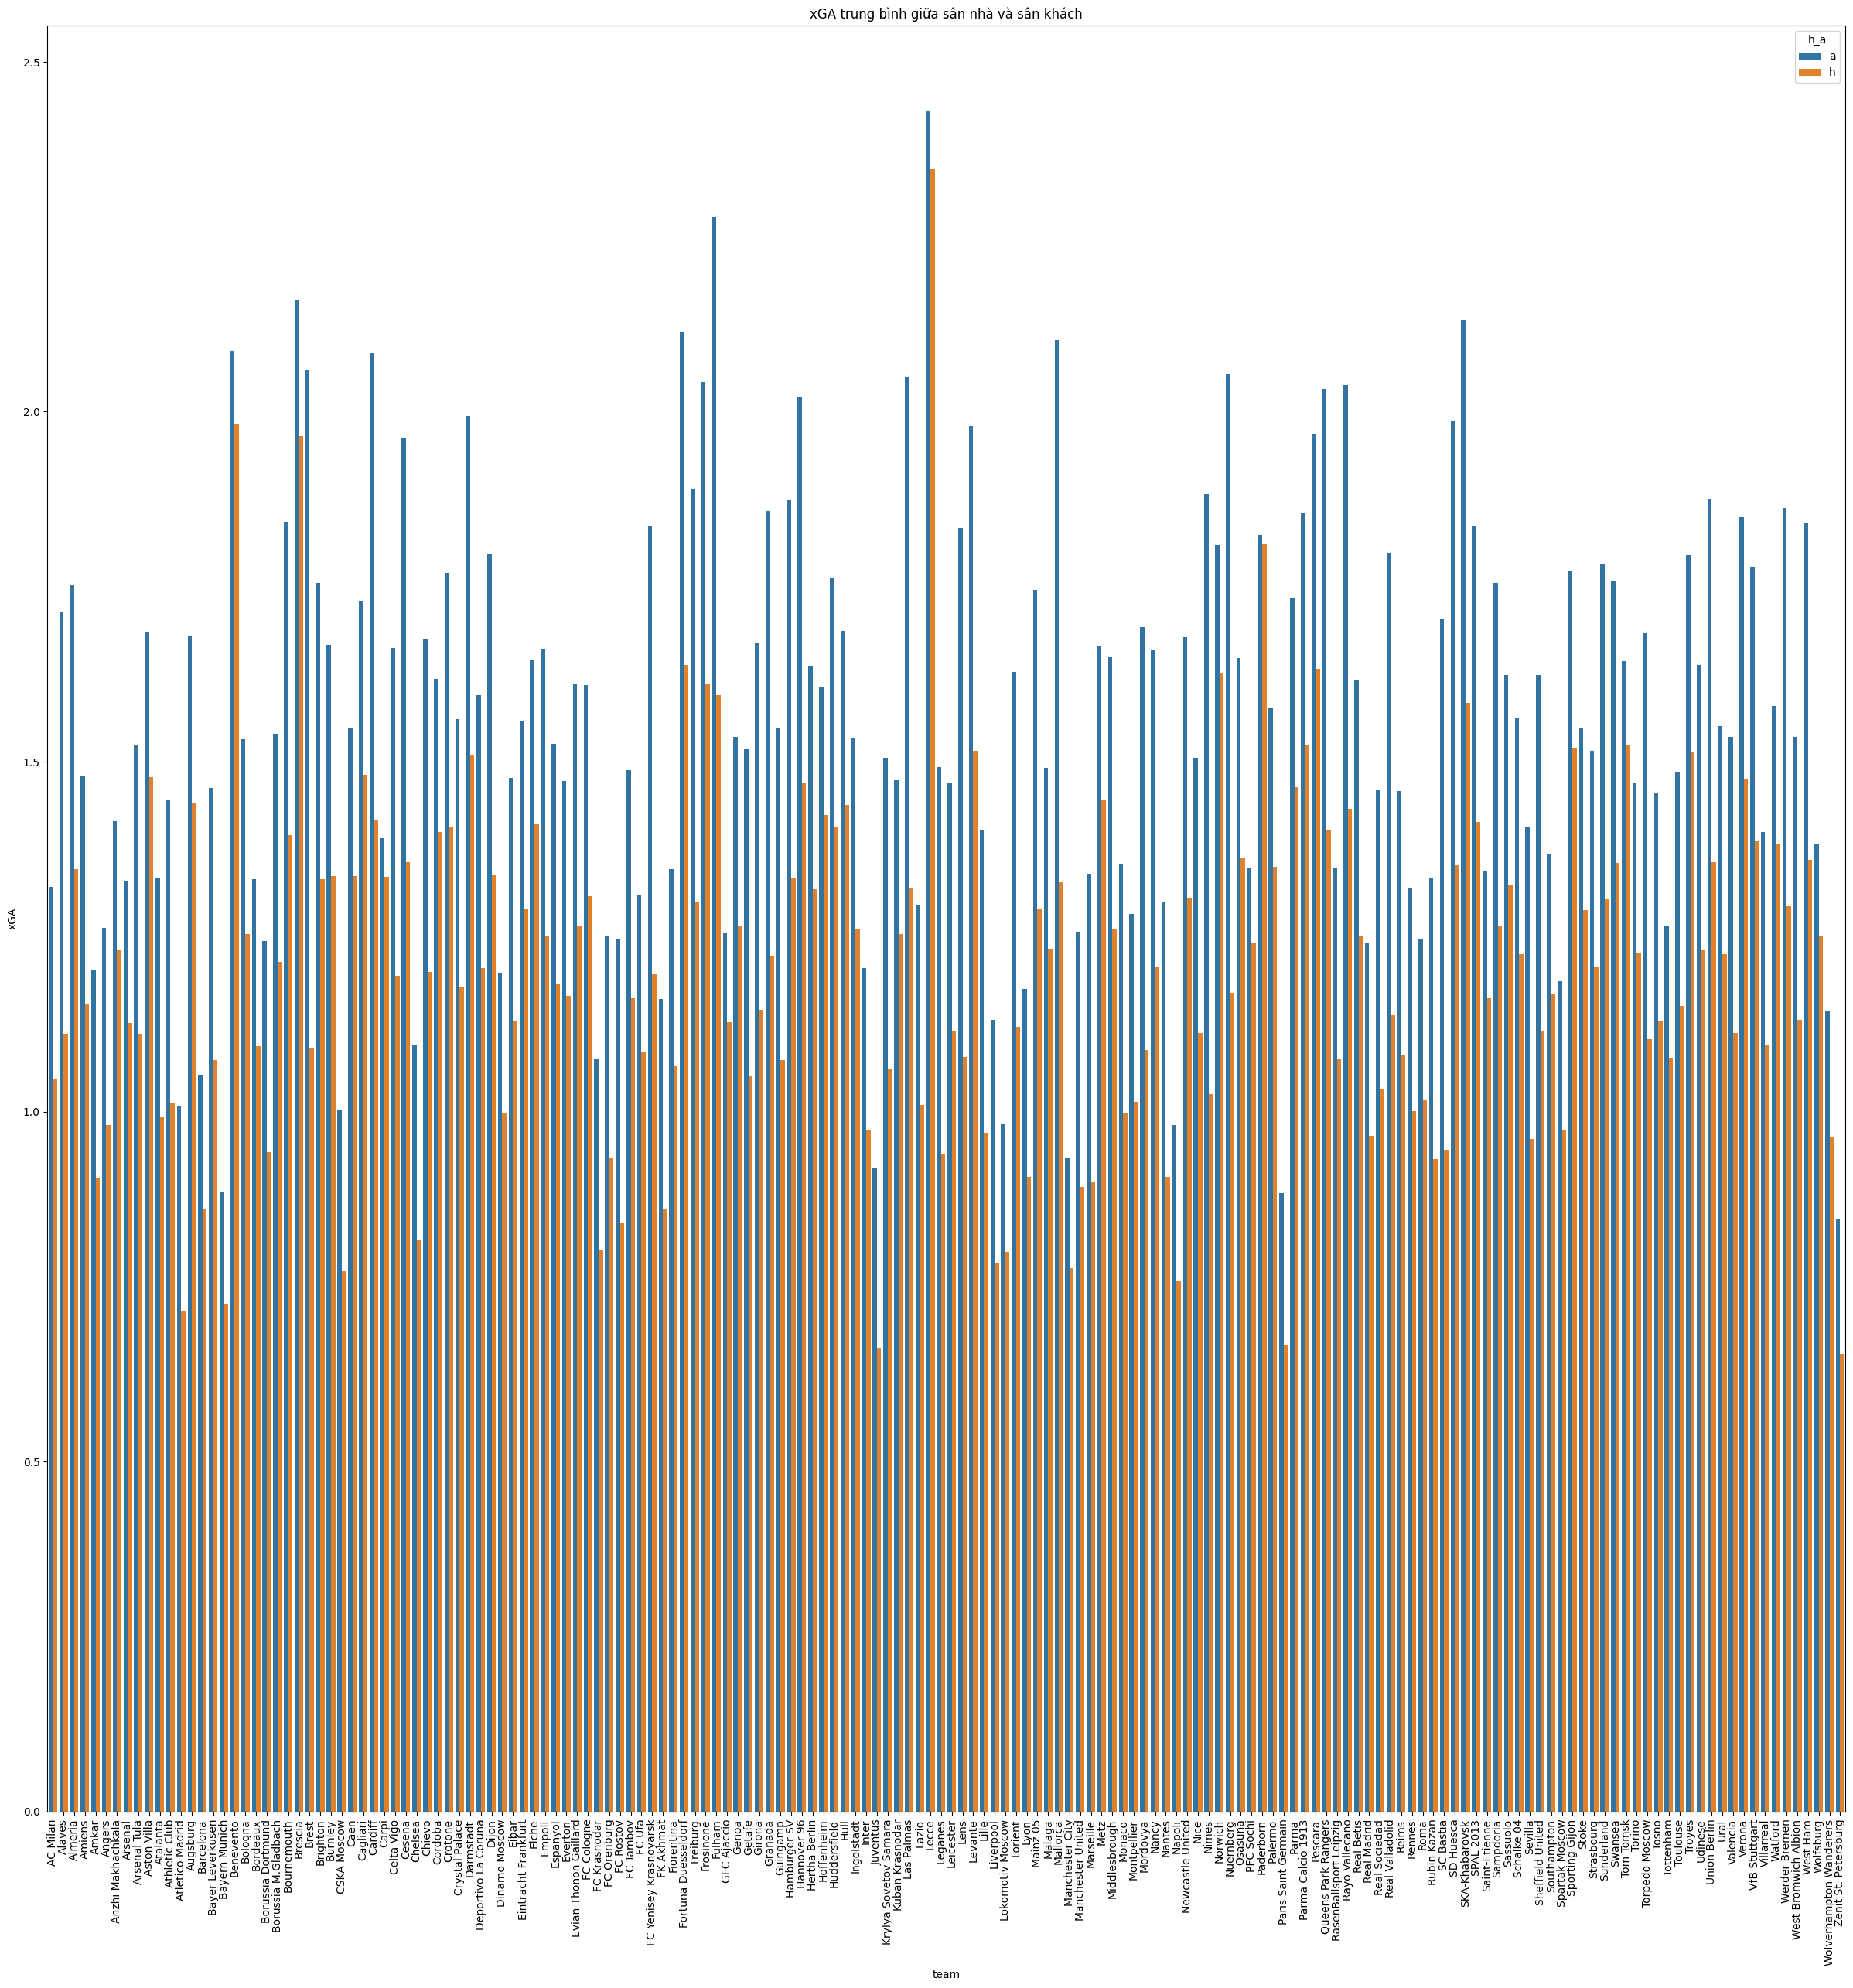

In [ ]:
plt.figure(figsize=(30, 30))
sns.barplot(x='team', y='xGA', hue='h_a', data=home_away_performance)
plt.title('xGA trung bình giữa sân nhà và sân khách')
plt.xticks(rotation=90)
plt.show()

### pts trung bình giữa sân nhà và sân khách

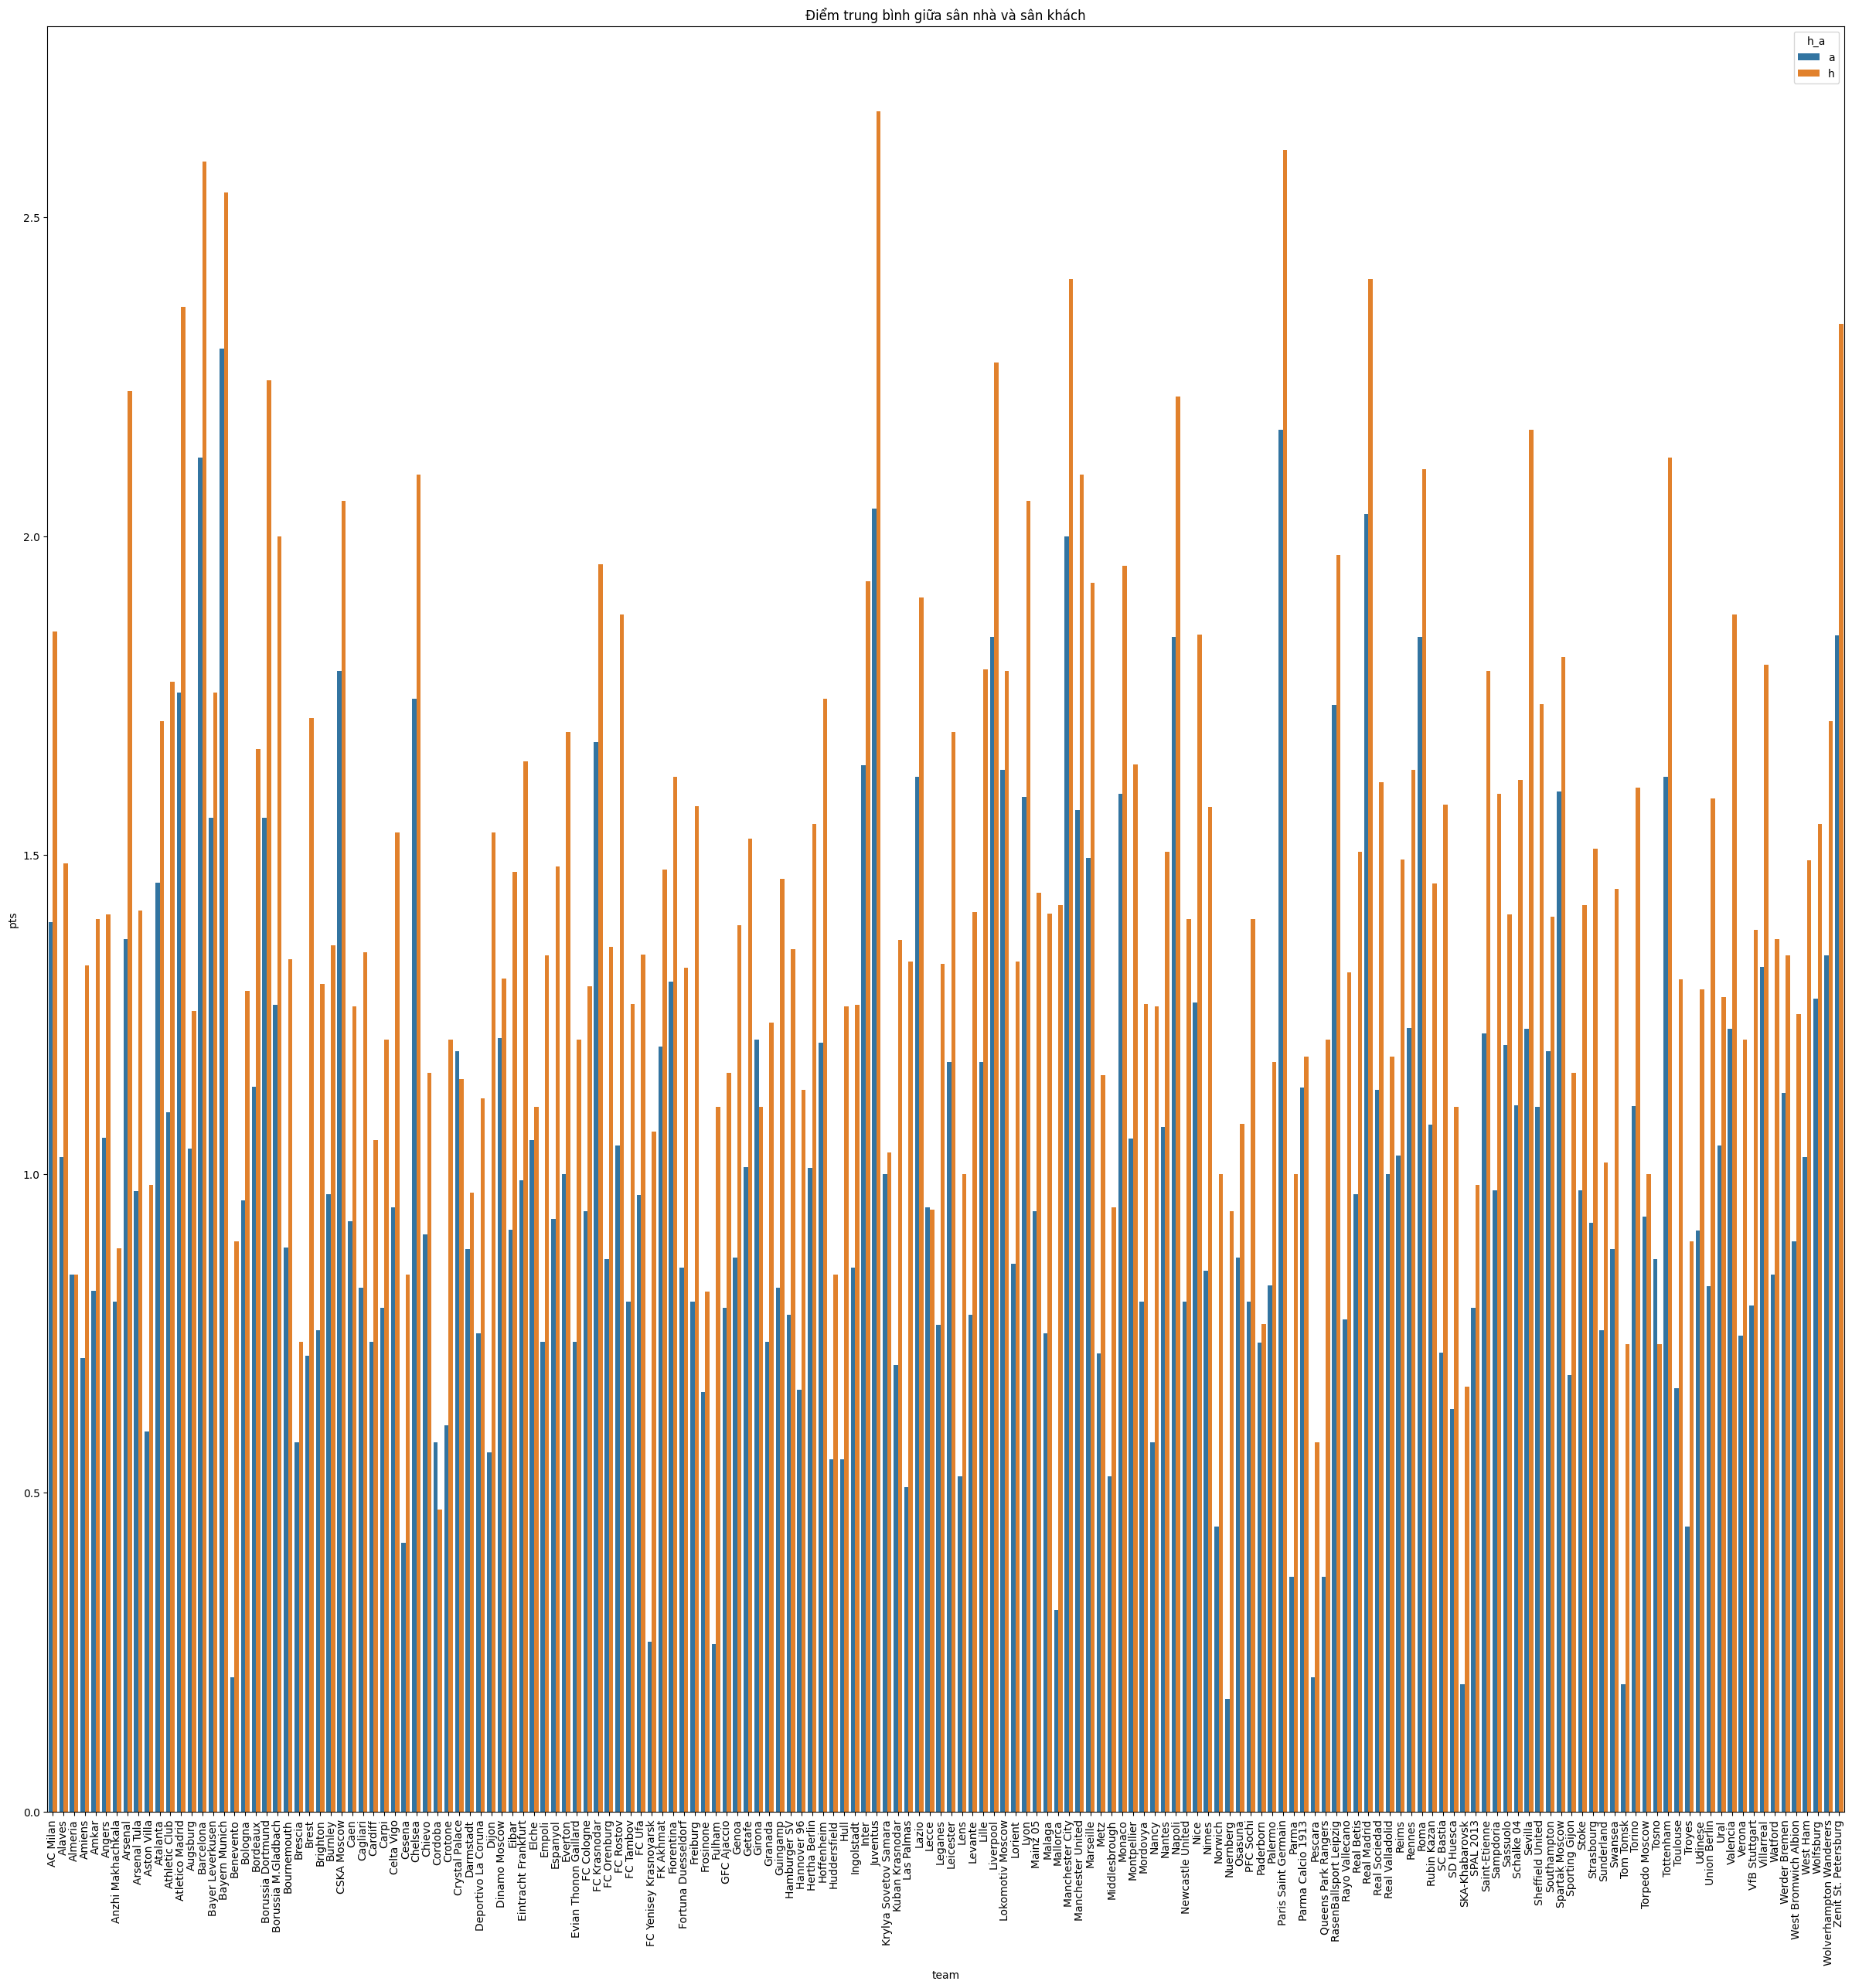

In [ ]:
plt.figure(figsize=(30, 30))
sns.barplot(x='team', y='pts', hue='h_a', data=home_away_performance)
plt.title('Điểm trung bình giữa sân nhà và sân khách')
plt.xticks(rotation=90)
plt.show()

## Câu 4: Tỷ lệ thắng của các trận đấu khi diễn ra trên sân nhà và trên sân khách qua từng mùa giải như thế nào?


**Ý nghĩa của câu hỏi**

Trả lời câu hỏi này sẽ giúp chúng ta:

- Hiểu được sự khác biệt về tỷ lệ thắng của các đội bóng khi chơi trên sân nhà và sân khách qua các mùa giải.
- Đánh giá ảnh hưởng của yếu tố sân bãi đến kết quả thi đấu của các đội bóng.

**Lợi ích khi trả lời câu hỏi**

Hiểu rõ lợi thế sân nhà (Home Advantage):
Truyền thống bóng đá cho thấy nhiều đội bóng có lợi thế khi thi đấu trên sân nhà, nhờ vào sự cổ vũ của khán giả và quen thuộc với môi trường thi đấu. Việc xác định tỷ lệ thắng sân nhà có thể giúp hiểu rõ hơn về mức độ tận dụng lợi thế này.


- Việc phân tích tỷ lệ thắng trên sân khách giúp chỉ ra khả năng thi đấu xa nhà của đội bóng. Nếu tỷ lệ thắng sân khách thấp hơn, điều này có thể chỉ ra các yếu tố như chiến thuật không phù hợp, áp lực từ đám đông, hoặc sự mệt mỏi do di chuyển.

- Câu hỏi giúp phân biệt các đội bóng có phong độ ổn định (thắng cả sân nhà và sân khách) và các đội bóng chỉ mạnh khi thi đấu trên sân nhà. Điều này có thể hữu ích trong việc xác định các đội có khả năng tranh chấp vô địch hoặc đội dễ bị tổn thương khi phải thi đấu xa nhà.

- Nếu tỷ lệ thắng sân khách thấp hơn nhiều so với sân nhà, các huấn luyện viên có thể cần điều chỉnh chiến thuật, chẳng hạn như thay đổi đội hình, phong cách chơi hoặc tăng cường sự chuẩn bị tâm lý cho cầu thủ khi thi đấu xa nhà.


In [ ]:
ratio = df_details[['year', 'h_a', 'result']].copy()
ratio['result'] = np.select([
    ratio['result'] == 'w',
    ratio['result'] == 'd',
    ratio['result'] == 'l',
], [1, 0.5, 0], default=np.nan)

ratio = ratio.groupby(['year', 'h_a'])['result'].mean().reset_index()
ratio = ratio.rename(columns={'result': 'win_ratio'})
ratio

year h_a  win_ratio
0   2014   a   0.421830
1   2014   h   0.578170
2   2015   a   0.429816
3   2015   h   0.570184
4   2016   a   0.397870
5   2016   h   0.602130
6   2017   a   0.426912
7   2017   h   0.573088
8   2018   a   0.423524
9   2018   h   0.576476
10  2019   a   0.444388
11  2019   h   0.555612

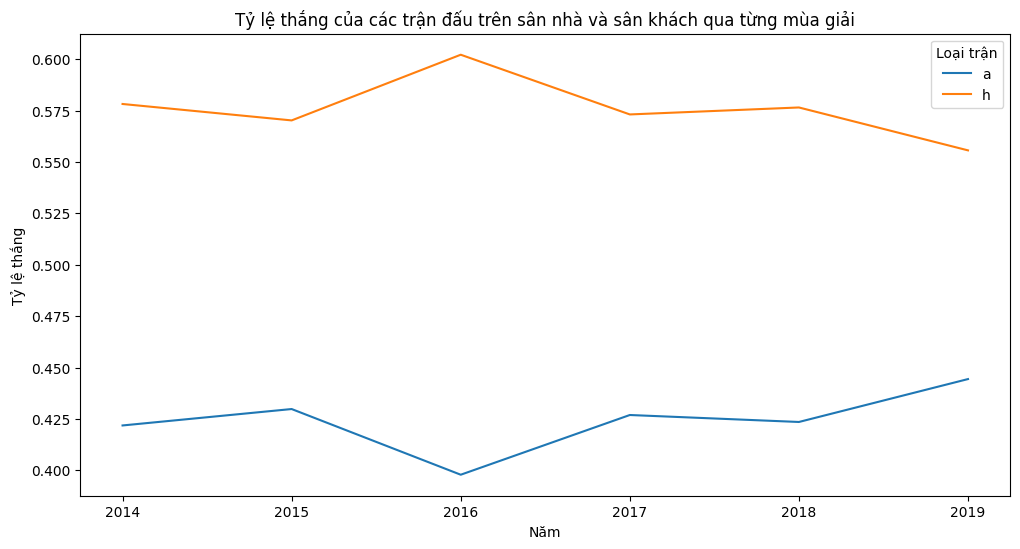

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=ratio, x='year', y='win_ratio', hue='h_a')
plt.title('Tỷ lệ thắng của các trận đấu trên sân nhà và sân khách qua từng mùa giải')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ thắng')
plt.legend(title='Loại trận')
plt.show()

**Nhận xét**
- Lợi thế sân nhà: Qua biểu đồ, ta thấy rõ ràng tỷ lệ thắng của các trận đấu sân nhà luôn cao hơn so với các trận đấu sân khách trong suốt giai đoạn thống kê. Điều này khẳng định lợi thế sân nhà là một yếu tố quan trọng ảnh hưởng đến kết quả các trận đấu.
- Sự biến động: Tỷ lệ thắng của cả trận sân nhà và sân khách đều có sự biến động qua các năm. Tuy nhiên, xu hướng chung cho thấy tỷ lệ thắng sân nhà có xu hướng tăng cao hơn so với tỷ lệ thắng sân khách, đặc biệt là vào năm 2016.

## Câu 5: Có sự khác biệt về chỉ số hiệu suất như ppda_coef, oppda_coef giữa các đội bóng khác nhau?



**Ý nghĩa của câu hỏi**

Câu hỏi này nhằm tìm hiểu sự khác biệt về các chỉ số hiệu suất PPDA_coef (chỉ số PPDA của đội bóng) và oppda_coef (chỉ số PPDA của đối thủ) giữa các đội bóng trong một giải đấu hoặc trong một số giải đấu khác nhau. Cụ thể:

- PPDA_coef (Chỉ số PPDA của đội bóng):
Đây là chỉ số đo lường cường độ pressing của đội bóng, tức là số đường chuyền của đối thủ trước khi đội bóng thực hiện một hành động phòng ngự (pressing). Chỉ số này cho thấy mức độ áp lực mà đội bóng áp đặt lên đối thủ trong suốt trận đấu. Nếu chỉ số PPDA thấp, có nghĩa là đội bóng tạo ra nhiều áp lực lên đối thủ và không cho phép họ thực hiện nhiều đường chuyền. Ngược lại, nếu chỉ số PPDA cao, đội bóng có thể ít gây áp lực lên đối thủ.

- oppda_coef (Chỉ số PPDA của đối thủ):
Đây là chỉ số đo lường mức độ pressing mà đối thủ áp dụng lên đội bóng của bạn. Nếu đối thủ có oppda_coef thấp, có nghĩa là họ không gây nhiều áp lực và đội của bạn có thể chơi tự do hơn. Nếu oppda_coef cao, đối thủ gây rất nhiều áp lực lên đội bóng của bạn, yêu cầu đội bóng của bạn phải chơi cẩn trọng và có chiến thuật phù hợp.

**Lợi ích khi trả lời câu hỏi**
- Phân tích sự khác biệt trong PPDA_coef và oppda_coef giúp nhận diện phong cách chơi của các đội bóng. Các đội bóng có PPDA_coef thấp thường có lối chơi pressing mạnh mẽ, trong khi các đội bóng có PPDA_coef cao có thể ưu tiên kiểm soát bóng hoặc chơi phòng ngự. Việc so sánh những chỉ số này giúp phân biệt các đội bóng có lối chơi pressing (tấn công) và những đội bóng phòng ngự hoặc kiểm soát trận đấu.

- Câu hỏi này giúp xác định liệu chiến thuật của đội bóng có phù hợp với lối chơi của các đối thủ. Một đội bóng có PPDA_coef thấp có thể cần một chiến thuật pressing mạnh mẽ khi đối đầu với đội bóng có oppda_coef thấp, trong khi nếu đối đầu với đội bóng có oppda_coef cao, đội bóng có thể phải chuyển sang chiến thuật phòng ngự hoặc kiểm soát bóng.
- Tăng cường khả năng phòng ngự và tấn công: Biết được đội bóng nào có chỉ số PPDA_coef thấp giúp các huấn luyện viên cải thiện chiến thuật tấn công và phòng ngự. Đối với đội bóng có PPDA_coef thấp, huấn luyện viên có thể áp dụng chiến thuật pressing mạnh mẽ để gây sức ép lên đối thủ. Ngược lại, nếu đội bóng có oppda_coef cao, đội bóng của bạn cần có chiến thuật phòng ngự vững chắc để đối phó với áp lực từ đối thủ.





In [ ]:
team_statsitic = df_details.groupby('team')[['ppda_coef', 'oppda_coef']].mean().reset_index()
team_statsitic

team  ppda_coef  oppda_coef
0                   AC Milan  10.016513   12.483679
1                     Alaves  11.959619    7.415865
2                    Almeria   8.761425    6.230164
3                     Amiens  11.715380    9.036024
4                      Amkar  12.435989    8.711455
..                       ...        ...         ...
163     West Bromwich Albion  14.086302    8.598033
164                 West Ham  12.438991    9.726541
165                Wolfsburg  11.150511   11.293303
166  Wolverhampton Wanderers  15.262196   11.923649
167     Zenit St. Petersburg   8.880600   13.667635

[168 rows x 3 columns]

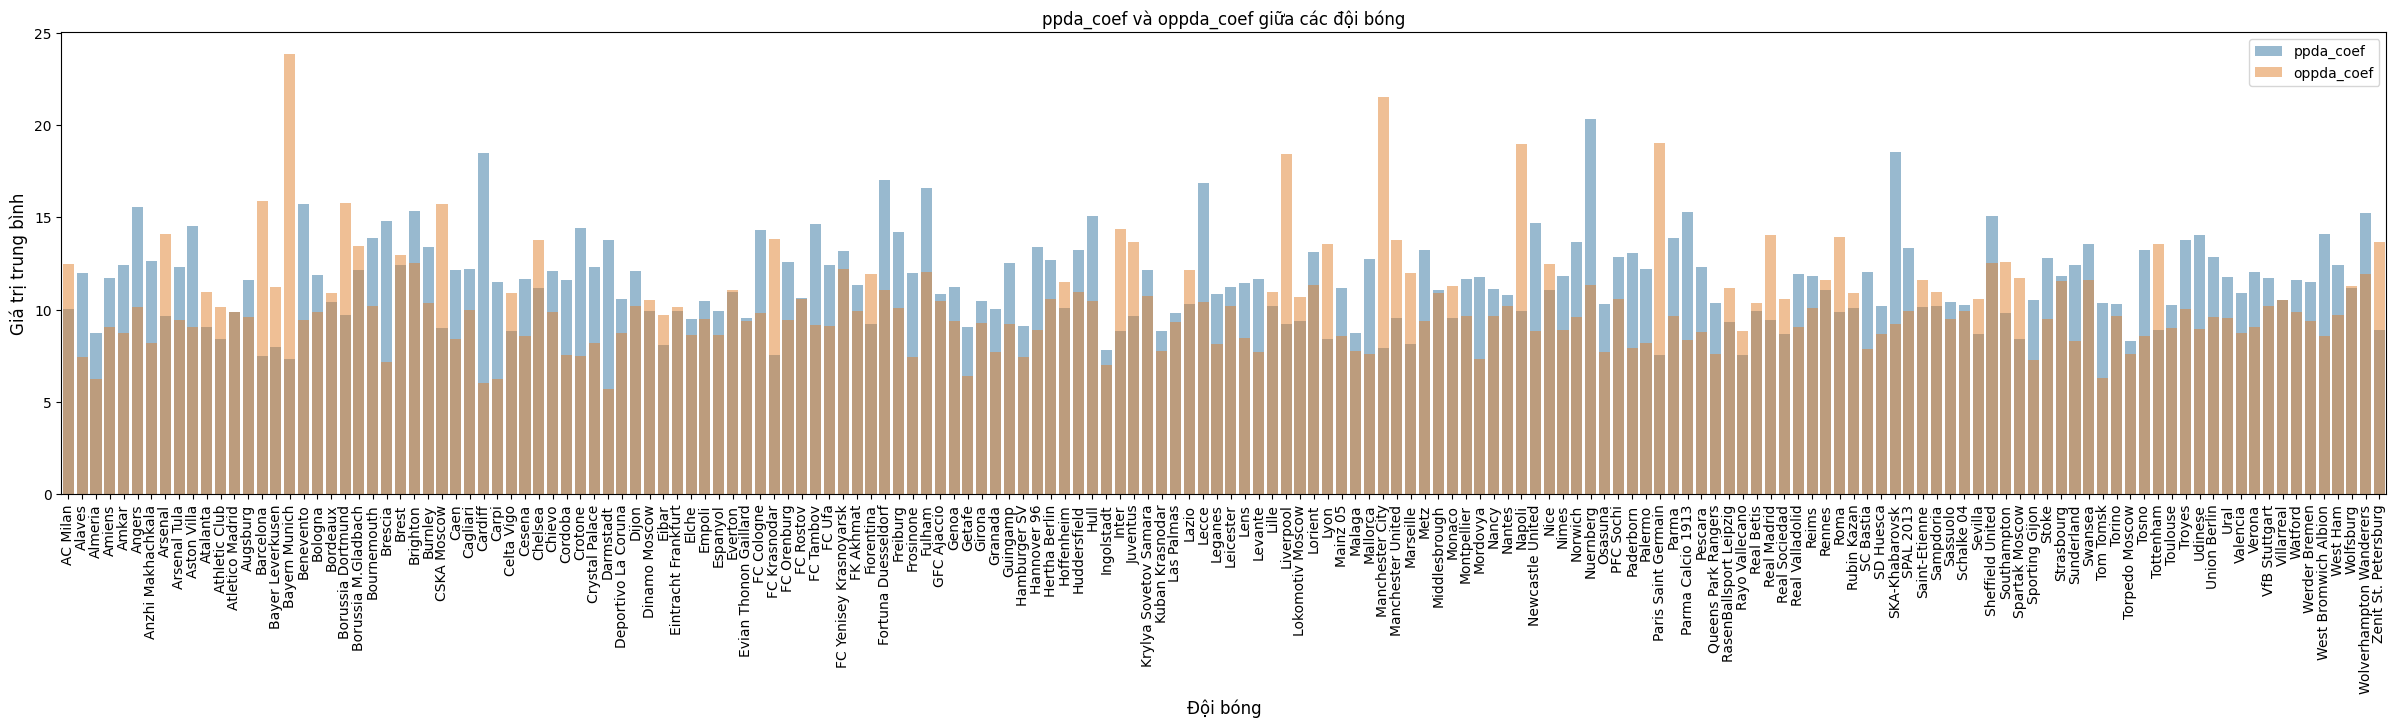

In [ ]:
plt.figure(figsize=(30, 6))
sns.barplot(x='team', y='ppda_coef', data=team_statsitic, alpha=0.5, label='ppda_coef')
sns.barplot(x='team', y='oppda_coef', data=team_statsitic, alpha=0.5, label='oppda_coef')
plt.title('ppda_coef và oppda_coef giữa các đội bóng')
plt.ylabel("Giá trị trung bình", fontsize=12)
plt.xlabel("Đội bóng", fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.show()


**Nhận xét**
- Paris Saint-Germain (PSG):

 - ppda_coef: PSG cũng có giá trị ppda_coef thấp, cho thấy họ thường áp dụng chiến thuật pressing mạnh.
 - oppda_coef: Tuy nhiên, họ có một chỉ số oppda_coef khá cao, cho thấy đối thủ gây nhiều áp lực lên PSG.
- Bayer Munich:

 - ppda_coef: Có mức độ pressing thấp, giống như các đội mạnh khác, cho phép họ kiểm soát trận đấu.
 - oppda_coef: Các đối thủ của Bayern Munich có chỉ số oppda_coef cao, cho thấy họ có thể gây rất nhiều áp lực lên Bayern trong các trận đấu. Đây gần như là chỉ oppda_coef cao nhất trong tất cả đội bóng
- Liverpool:

 - ppda_coef: Giá trị thấp, đồng nghĩa với việc họ chơi pressing mạnh mẽ trong trận đấu.
 - oppda_coef: Tuy nhiên, đội bóng này cũng phải đối mặt với áp lực từ đối thủ với oppda_coef cao, chứng tỏ họ gặp phải những đội bóng cũng có khả năng pressing mạnh mẽ.
- Cardiff và Nuernberg, SD Huesca:
 - ppda_coef: Các đội này có giá trị ppda_coef khá cao, cho thấy lối chơi ít gây áp lực, có thể tập trung vào phòng ngự hoặc kiểm soát bóng.
 - oppda_coef: Đối thủ của họ không gây quá nhiều áp lực, điều này thể hiện qua giá trị oppda_coef thấp.

## Câu hỏi 6: Các đội bóng có số trận thắng cao có đặc điểm gì về số bàn thắng và số bàn thua?

**Ý nghĩa của câu hỏi:**  
Mối quan hệ giữa số trận thắng và số bàn thắng, bàn thua giúp xác định tầm quan trọng của việc tấn công hiệu quả hoặc phòng ngự chắc chắn. Ví dụ, một đội thắng nhiều trận nhờ phòng ngự tốt có thể có số bàn thắng không quá cao.


**Lợi ích khi trả lời câu hỏi:**
Giúp các đội bóng điều chỉnh chiến thuật (tấn công hoặc phòng ngự) phù hợp với mục tiêu đạt thứ hạng cao.

In [ ]:
wins_stats = df_overview.groupby("wins")[["scored", "missed"]].mean().reset_index()
wins_stats

wins     scored     missed
0      2  25.333333  71.000000
1      3  23.428571  70.428571
2      4  32.571429  68.285714
3      5  27.133333  60.733333
4      6  31.294118  60.117647
5      7  30.187500  54.093750
6      8  35.162791  53.023256
7      9  37.526316  55.614035
8     10  39.214286  53.089286
9     11  40.785714  50.557143
10    12  44.285714  51.696429
11    13  48.209302  50.534884
12    14  47.050000  46.300000
13    15  48.974359  45.461538
14    16  52.533333  41.633333
15    17  55.285714  42.500000
16    18  58.724138  40.551724
17    19  59.727273  38.818182
18    20  61.928571  34.857143
19    21  73.133333  44.600000
20    22  69.384615  33.769231
21    23  74.428571  37.214286
22    24  81.875000  37.375000
23    25  80.600000  27.600000
24    26  84.777778  32.444444
25    27  87.500000  27.500000
26    28  88.125000  29.000000
27    29  97.166667  30.166667
28    30  99.571429  26.857143
29    32  95.333333  27.666667

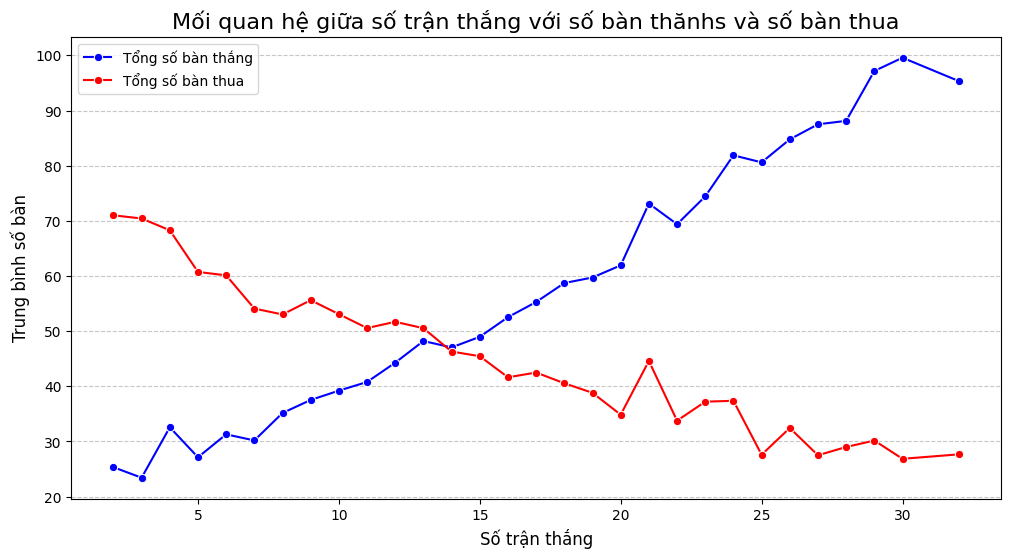

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=wins_stats, x="wins", y="scored", label="Tổng số bàn thắng", marker="o", color="blue")
sns.lineplot(data=wins_stats, x="wins", y="missed", label="Tổng số bàn thua", marker="o", color="red")
plt.title("Mối quan hệ giữa số trận thắng với số bàn thănhs và số bàn thua", fontsize=16)
plt.xlabel("Số trận thắng", fontsize=12)
plt.ylabel("Trung bình số bàn", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


**Nhận xét**
- Các đội có số trận thắng cao hơn (từ 15 trở lên) thường ghi được nhiều bàn thắng hơn và để thủng lưới ít hơn.
- Khi số trận thắng tăng lên, số bàn thắng trung bình cũng tăng đáng kể, trong khi số bàn thua giảm dần.

- Các đội có từ 27 trận thắng trở lên thường ghi trung bình hơn 87 bàn thắng và chỉ để thủng lưới khoảng 30 bàn. Đây là sự vượt trội về cả tấn công và phòng thủ.
- Đặc biệt, đội thắng 32 trận ghi tới 95.3 bàn thắng và chỉ để thủng lưới 27.7 bàn, cho thấy sự cân bằng xuất sắc.
- Các đội có từ 15-20 trận thắng ghi trung bình 50-70 bàn thắng, nhưng vẫn để thủng lưới khoảng 45-50 bàn. Điều này cho thấy sự thiếu ổn định trong phòng ngự so với các đội top đầu.

- Các đội thắng dưới 10 trận có số bàn thắng thấp, khoảng 28-40 bàn, nhưng số bàn thua cao, dao động từ 60-70 bàn. Điều này chỉ ra rằng các đội này gặp khó khăn trong cả tấn công lẫn phòng thủ.

**Có một mối quan hệ chặt chẽ giữa số trận thắng và hiệu suất ghi bàn, cũng như khả năng phòng ngự.Các đội thắng nhiều trận thường ghi được số lượng bàn thắng lớn, thể hiện sức mạnh tấn công.
Giữ số bàn thua thấp, cho thấy sự chắc chắn trong phòng ngự.**

## Câu 7: Các đội bóng nào có tỷ lệ trận hòa (draws) cao nhất trong tất cả mùa giải và giải đấu? Điều gì có thể giải thích xu hướng này?



**Ý nghĩa của câu hỏi**

Câu hỏi này nhằm hiểu rõ hơn về những đội bóng có tỷ lệ trận hòa cao và khám phá lý do tại sao họ lại có xu hướng này. Trận hòa là một phần không thể thiếu trong bóng đá, và việc phân tích các đội bóng có tỷ lệ trận hòa cao giúp cung cấp cái nhìn sâu sắc về phong cách thi đấu, chiến thuật và yếu tố ảnh hưởng đến kết quả trận đấu của các đội bóng đó.

**Lợi ích khi trả lời câu hỏi**
- Đội bóng có tỷ lệ hòa cao thường là những đội bóng ổn định về mặt kết quả, vì họ ít bị thất bại nhưng cũng không có quá nhiều chiến thắng. Điều này giúp đội bóng duy trì điểm số ở mức ổn định trong suốt mùa giải.

- Biết được những đội bóng có xu hướng hòa nhiều giúp người hâm mộ, huấn luyện viên và các nhà phân tích có cái nhìn dự đoán chính xác hơn về kết quả trong các trận đấu tiếp theo của đội bóng đó. Điều này cũng có thể giúp đưa ra chiến thuật hợp lý khi đối đầu với các đội này.

- Các yếu tố như phong cách chơi, chiến thuật của huấn luyện viên, chất lượng đội hình hay sự thiếu hiệu quả trong tấn công có thể được giải thích qua tỷ lệ hòa cao. Việc phân tích các yếu tố này sẽ giúp đội bóng cải thiện phong độ và giảm tỷ lệ trận hòa trong tương lai.

In [ ]:
df_overview['draw_rate'] = df_overview['draws'] / df_overview['matches']
top_draw_teams = df_overview.sort_values(by="draw_rate", ascending=False).head(10)
top_draw_teams

league  year  position                 team  matches  wins  draws  \
663     RFPL  2018        12        Dinamo Moscow       30     6     15   
662     RFPL  2018        11          Rubin Kazan       30     7     15   
501  Ligue_1  2015        14            Marseille       38    10     18   
537  Ligue_1  2017        10          Montpellier       38    11     18   
362  Serie_A  2014        15               Empoli       38     8     18   
34   La_liga  2015        15  Deportivo La Coruna       38     8     18   
675     RFPL  2019         8               FC Ufa       30     8     14   
441  Serie_A  2018        14           Fiorentina       38     8     17   
354  Serie_A  2014         7            Sampdoria       38    13     17   
136      EPL  2014        17           Sunderland       38     7     17   

     loses  scored  missed  ...   xGA_diff      npxGA      npxGD  ppda_coef  \
663      9      28      28  ...  -2.254465  22.728440   9.350924  10.107709   
662      8      24      30  ...   0.627439  26.856063  -1.601300  11.682631   
501     10      48      42  ...   0.667824  37.347143   8.501270   7.913906   
537      9      36      33  ...   4.928823  33.368520   4.920138  13.286093   
362     12      46      52  ...  -8.577626  41.899778   5.479243   9.221540   
34      12      45      61  ...  -8.625963  49.400919  -6.397105  11.324321   
675      8      22      24  ...  11.741799  33.478979 -11.237055  15.750463   
441     13      47      45  ...  -0.921591  39.510732  10.044548   9.725814   
354      8      48      42  ...   6.370173  43.041074   3.021585   8.819564   
136     14      31      53  ...  -1.535629  48.419705 -14.018229  11.421301   

     oppda_coef  deep  deep_allowed     xpts  xpts_diff  draw_rate  
663   10.472481   215           146  46.7240    13.7240   0.500000  
662   12.743662   171           163  38.9681     2.9681   0.500000  
501   11.006175   202           167  55.4681     7.4681   0.473684  
537    9.962922   152           169  52.9380     1.9380   0.473684  
362    9.552837   236           233  56.9401    14.9401   0.473684  
34     8.739138   166           240  46.0791     4.0791   0.473684  
675    9.715629   162           233  32.8336    -5.1664   0.466667  
441   10.542369   211           194  59.2180    18.2180   0.447368  
354    8.672494   209           246  52.8465    -3.1535   0.447368  
136    8.129492   153           313  44.1821     6.1821   0.447368  

[10 rows x 25 columns]

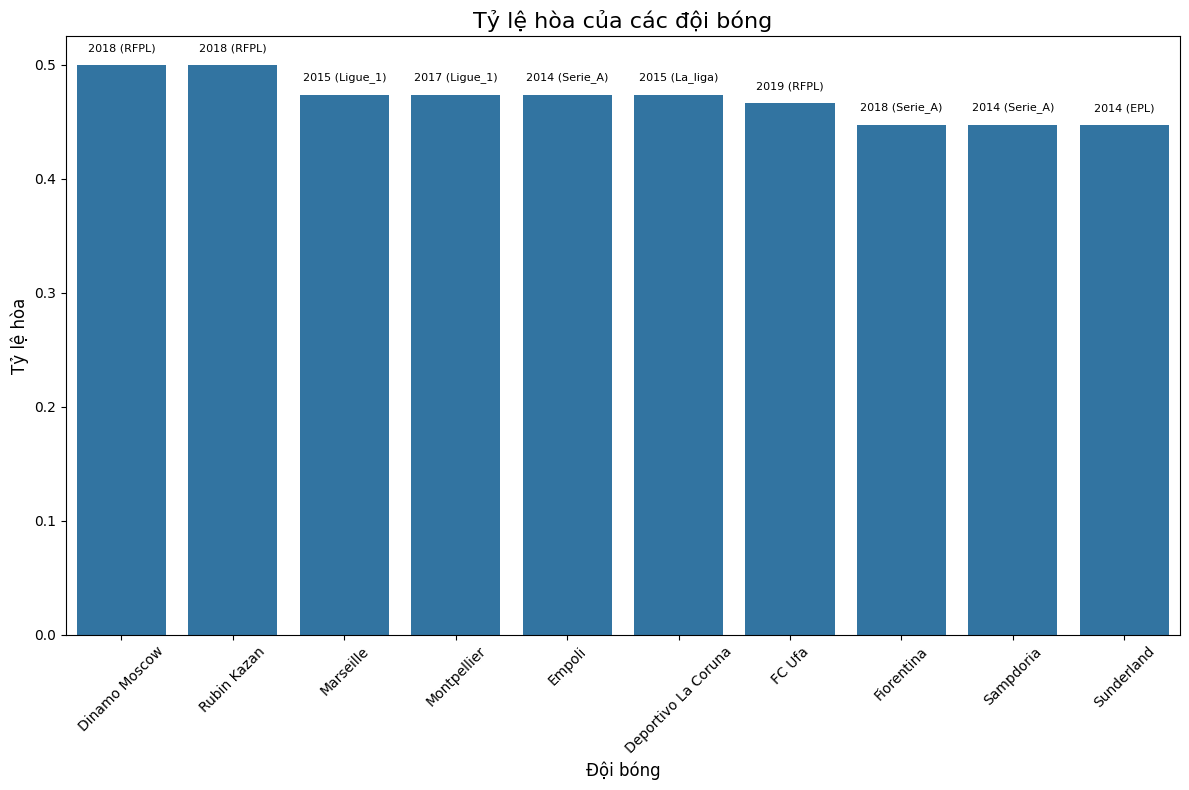

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='team', y='draw_rate', data=top_draw_teams)
plt.title('Tỷ lệ hòa của các đội bóng', fontsize=16)
plt.xlabel('Đội bóng', fontsize=12)
plt.ylabel('Tỷ lệ hòa', fontsize=12)
plt.xticks(rotation=45)

for i, p in enumerate(ax.patches):
    team_name = top_draw_teams.iloc[i]['team']
    season = top_draw_teams.iloc[i]['year']
    league = top_draw_teams.iloc[i]['league']

    annotation = f"{season} ({league})"

    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.01,
            annotation, ha="center", va="bottom", fontsize=8)

plt.tight_layout()

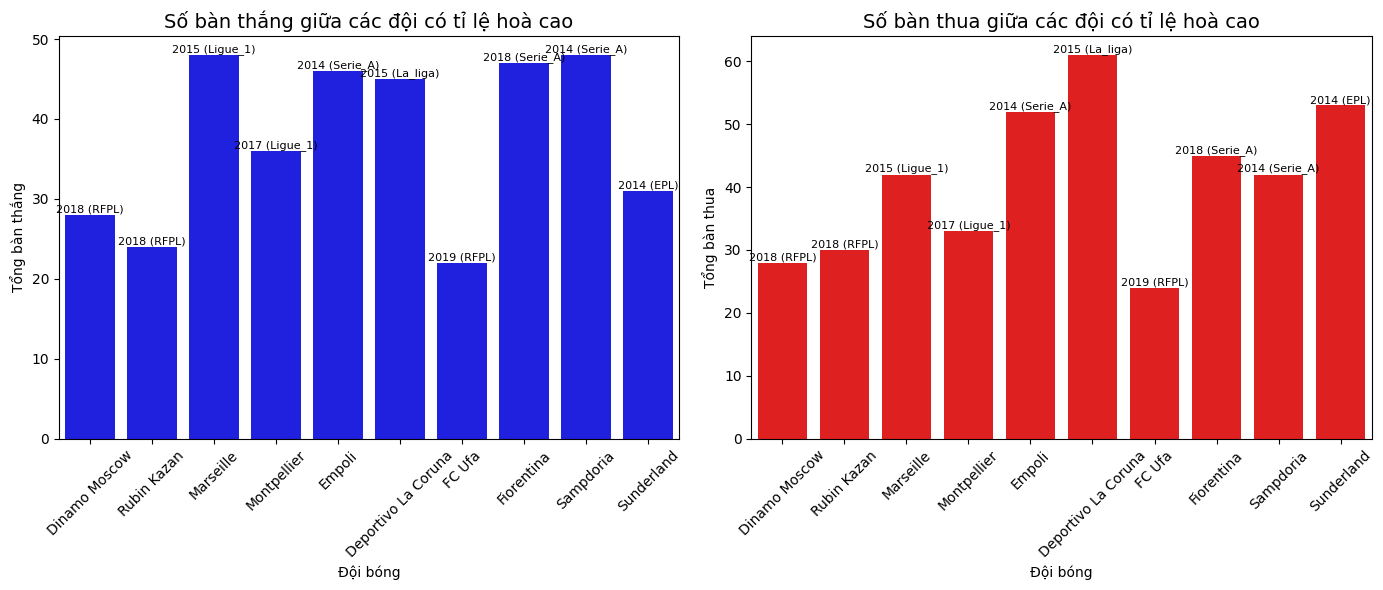

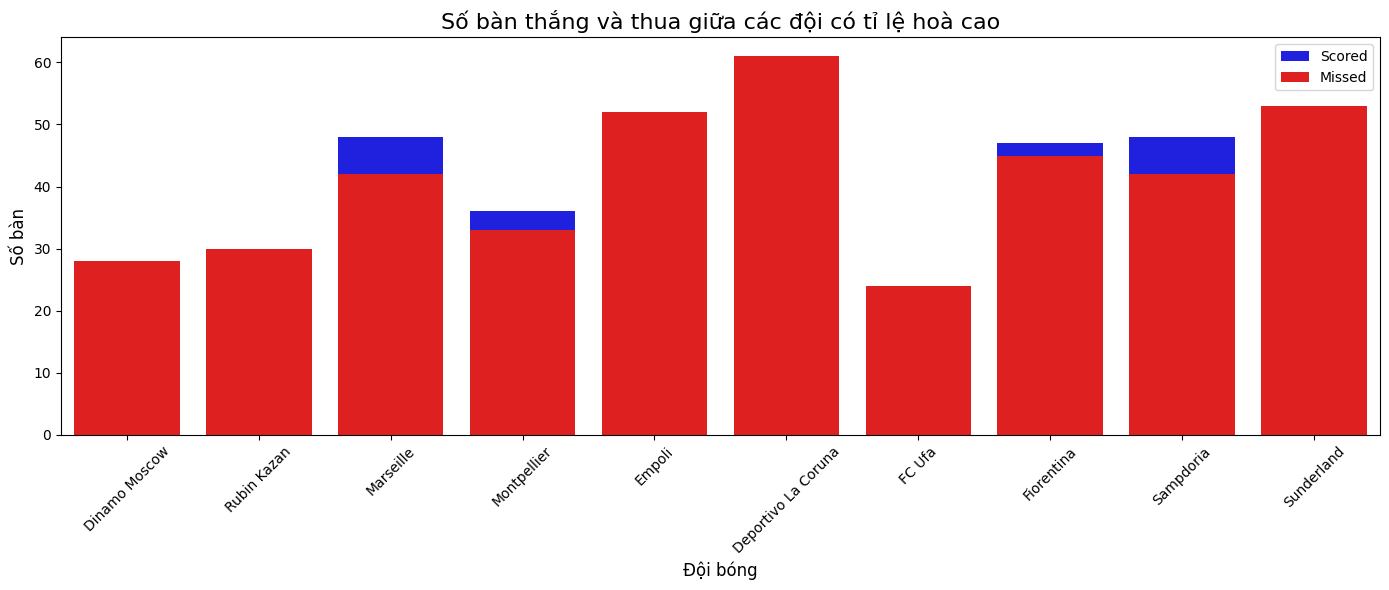

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def annotate_bars(ax, data):
    for i, p in enumerate(ax.patches):
        if i < len(data):
            team_name = data.iloc[i]['team']
            season = data.iloc[i]['year']
            league = data.iloc[i]['league']
            annotation = f"{season} ({league})"
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.01,
                    annotation, ha="center", va="bottom", fontsize=8)


plt.figure(figsize=(14, 6))

# Barplot for goals scored
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x="team", y="scored", data=top_draw_teams, color='blue')
plt.title("Số bàn thắng giữa các đội có tỉ lệ hoà cao", fontsize=14)
plt.xlabel("Đội bóng")
plt.ylabel("Tổng bàn thắng")
plt.xticks(rotation=45)
annotate_bars(ax1, top_draw_teams)

# Barplot for goals missed
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x="team", y="missed", data=top_draw_teams, color='red')
plt.title("Số bàn thua giữa các đội có tỉ lệ hoà cao", fontsize=14)
plt.xlabel("Đội bóng")
plt.ylabel("Tổng bàn thua")
plt.xticks(rotation=45)
annotate_bars(ax2, top_draw_teams)

plt.tight_layout()
plt.show()


# Mix plot with league and season annotations ---

plt.figure(figsize=(14, 6))
ax3 = sns.barplot(x='team', y='scored', data=top_draw_teams, color='blue', label='Scored')
sns.barplot(x='team', y='missed', data=top_draw_teams, color='red', label='Missed')
plt.title('Số bàn thắng và thua giữa các đội có tỉ lệ hoà cao', fontsize=16)
plt.xlabel('Đội bóng', fontsize=12)
plt.ylabel('Số bàn', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Câu hỏi 8: Liệu một đội có số trận thắng cao, số trận thua ít thì có xếp hạng cao hơn không? Thống kê trung bình win-draws-losses giữa các thứ hạng.

**Ý nghĩa của câu hỏi:**  
Hiểu rõ sự khác biệt về hiệu suất thi đấu giữa các đội có thứ hạng cao và thấp, cụ thể là số trận thắng, hòa và thua trung bình. Điều này giúp làm sáng tỏ yếu tố nào quan trọng nhất để đạt thứ hạng cao.


**Lợi ích khi trả lời câu hỏi:**
Hỗ trợ các đội xác định mục tiêu cụ thể, chẳng hạn như tối thiểu hóa số trận thua hoặc tăng số trận thắng để cải thiện thứ hạng.

In [ ]:
rank_stats = df_overview.groupby("position")[["wins", "draws", "loses"]].mean().reset_index()
rank_stats

position       wins      draws      loses
0          1  26.444444   5.555556   3.694444
1          2  22.666667   7.305556   5.750000
2          3  20.055556   9.000000   6.666667
3          4  18.555556   8.777778   8.388889
4          5  17.333333   8.166667  10.222222
5          6  15.638889   9.583333  10.500000
6          7  14.666667   9.166667  11.888889
7          8  13.277778  10.277778  12.138889
8          9  12.722222   9.638889  13.333333
9         10  11.888889  10.055556  13.750000
10        11  11.250000  10.055556  14.361111
11        12  11.000000   9.750000  14.944444
12        13  10.416667   9.388889  15.916667
13        14   9.694444   9.527778  16.500000
14        15   9.222222   9.750000  16.722222
15        16   8.638889   8.972222  18.083333
16        17   8.466667  10.600000  17.766667
17        18   8.033333   8.466667  20.333333
18        19   7.041667   8.666667  21.875000
19        20   5.000000   8.458333  24.083333

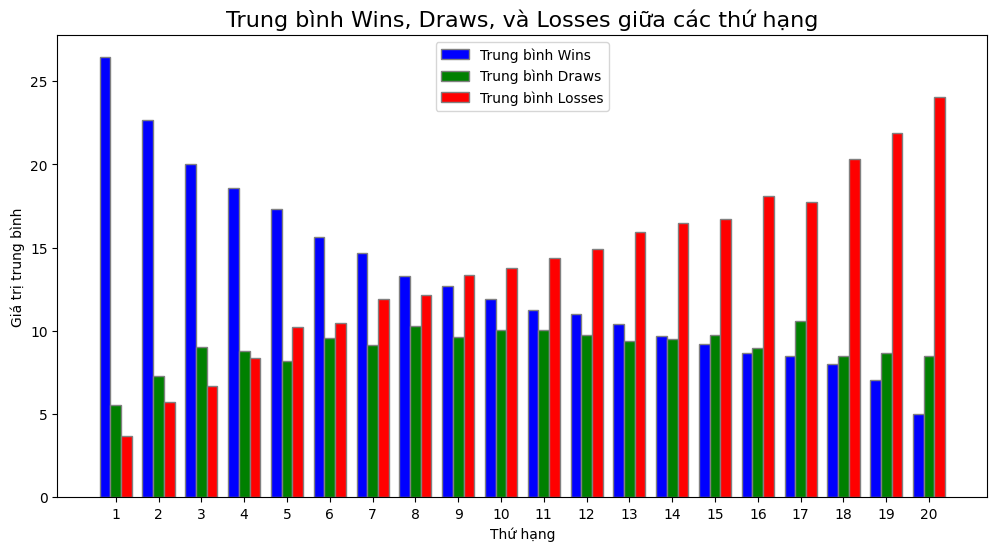

In [ ]:
barWidth = 0.25

r1 = np.arange(len(rank_stats["wins"]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(12, 6))
plt.bar(r1, rank_stats["wins"], color="blue", width=barWidth, edgecolor="grey", label="Trung bình Wins")
plt.bar(r2, rank_stats["draws"], color="green", width=barWidth, edgecolor="grey", label="Trung bình Draws")
plt.bar(r3, rank_stats["loses"], color="red", width=barWidth, edgecolor="grey", label="Trung bình Losses")

plt.xlabel("Thứ hạng")
plt.ylabel("Giá trị trung bình")
plt.xticks([r + barWidth for r in range(len(rank_stats["wins"]))], rank_stats["position"])
plt.title("Trung bình Wins, Draws, và Losses giữa các thứ hạng", fontsize=16)
plt.legend()
plt.show()

**Nhận xét**
- Nhìn chung, các đội có Ranking cao (vị trí đầu bảng) có số trận thắng (Wins) cao hơn, số trận hòa (Draws) và thua (Losses) ít hơn.
- Các đội có Ranking thấp (vị trí cuối bảng) có số trận thắng thấp hơn, số trận hòa và thua cao hơn.
- Từ vị trí 1 đến 20, ta thấy một sự suy giảm rõ rệt về số trận thắng. Ví dụ, đội xếp hạng 1 có 26.4 trận thắng, trong khi đội xếp hạng 20 chỉ có 5.0 trận thắng.
- Số trận thua của các đội cũng tăng dần theo thứ hạng, từ 3.7 trận thua ở đội xếp hạng 1 lên tới 24 trận thua ở đội xếp hạng 20.

- Số trận hòa của các đội có sự dao động nhỏ, với đội đứng hạng cao nhất có 5.5 trận hòa, trong khi đội xếp hạng 20 có 8.5 trận hòa. Tuy nhiên, các đội ở vị trí giữa bảng xếp hạng có số trận hòa khá ổn định và gần như không có sự chênh lệch quá lớn.



## Câu 9: Đội bóng có hiệu suất tốt nhất trong mỗi giải đấu

**Ý nghĩa của câu hỏi**

Câu hỏi này nhằm xác định đội bóng có hiệu suất tốt nhất trong mỗi giải đấu, tức là đội bóng đạt được kết quả xuất sắc nhất về mặt chiến thắng, bàn thắng ghi được, phòng ngự, và các chỉ số quan trọng khác trong suốt mùa giải. Đây là một cách đánh giá tổng thể về sự xuất sắc và ưu việt của các đội bóng trong mỗi giải đấu, từ đó đưa ra cái nhìn khách quan về các đội bóng mạnh nhất trong từng mùa giải.

**Lợi ích khi trả lời câu hỏi**
Trả lời câu hỏi này giúp nhận diện được đội bóng có hiệu suất xuất sắc nhất trong từng giải đấu, dựa trên các chỉ số quan trọng như số bàn thắng ghi được, hiệu suất phòng ngự, tỷ lệ thắng, và các chỉ số thống kê khác. Điều này giúp các chuyên gia và người hâm mộ hiểu rõ hơn về những đội bóng vượt trội trong giải đấu.


In [ ]:
df_overview['win_rate'] = df_overview['wins'] / df_overview['matches']
best_teams_by_league = df_overview.loc[df_overview.groupby('league')['win_rate'].idxmax()][['league', 'team', 'win_rate', 'matches', 'wins']]
best_teams_by_league

league                 team  win_rate  matches  wins
258  Bundesliga        Bayern Munich  0.823529       34    28
180         EPL      Manchester City  0.842105       38    32
0       La_liga            Barcelona  0.789474       38    30
568     Ligue_1  Paris Saint Germain  0.814815       27    22
620        RFPL       Spartak Moscow  0.733333       30    22
408     Serie_A             Juventus  0.789474       38    30

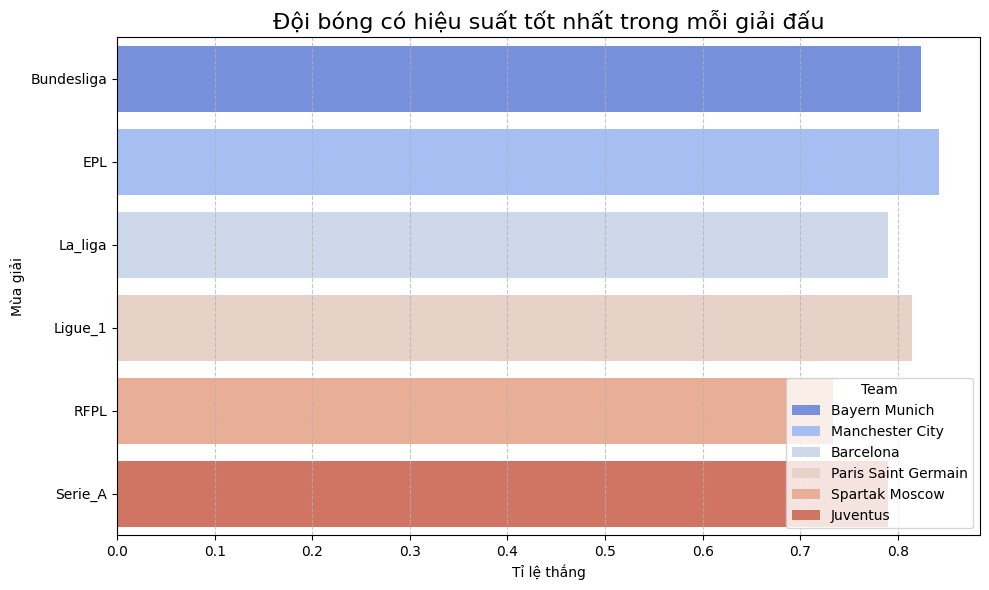

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=best_teams_by_league, x='win_rate', y='league', hue='team', palette='coolwarm')
plt.title("Đội bóng có hiệu suất tốt nhất trong mỗi giải đấu", fontsize=16)
plt.xlabel("Tỉ lệ thắng")
plt.ylabel("Mùa giải")
plt.legend(title="Team", loc="lower right")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Nhận xét**

Biểu đồ này cho thấy sự vượt trội của các đội bóng lớn trong các giải đấu hàng đầu như Bundesliga, EPL, La Liga, và Serie A. Các đội như Bayern Munich, Manchester City, và Juventus không chỉ thể hiện sự thống trị trong nước mà còn phản ánh chất lượng cao về đội hình và chiến thuật. Những đội bóng này thường có tỷ lệ thắng cao và duy trì sự ổn định trong suốt mùa giải.





## Câu 10: Các chỉ số như deep và deep_allowed có mối quan hệ thế nào với thứ hạng cuối cùng

**Ý nghĩa của câu hỏi**

- Chỉ số deep (số lần chạm bóng hoặc hành động quan trọng trong khu vực tấn công sâu, gần khung thành đối thủ) phản ánh mức độ hiệu quả trong việc đưa bóng vào khu vực nguy hiểm, tạo cơ hội ghi bàn.
- Ngược lại, deep_allowed (số lần để đối thủ thực hiện hành động trong khu vực phòng ngự của mình) thể hiện khả năng phòng ngự và hạn chế cơ hội nguy hiểm từ đối thủ.
- Câu hỏi này giúp đánh giá xem khả năng kiểm soát và tận dụng khu vực nguy hiểm trên sân có mối tương quan như thế nào với kết quả thứ hạng cuối cùng của một đội bóng trong mùa giải.

**Lợi ích khi trả lời câu hỏi**

Nếu phân tích cho thấy các đội có thứ hạng cao thường có deep cao và deep_allowed thấp, các đội bóng khác có thể tập trung cải thiện khả năng đưa bóng vào khu vực nguy hiểm và nâng cao khả năng phòng ngự tại các vị trí quan trọng.
Các huấn luyện viên có thể sử dụng dữ liệu này để điều chỉnh chiến thuật phù hợp, như gia tăng áp lực trong khu vực tấn công hoặc củng cố hàng thủ ở khu vực sâu.


In [ ]:
position_stats = merged_data.groupby('position')[['deep', 'deep_allowed']].mean().reset_index()
position_stats

position       deep  deep_allowed
0          1  10.264591      3.817899
1          2   8.799378      4.377138
2          3   7.838258      4.468118
3          4   7.488336      4.838258
4          5   6.972006      5.202177
5          6   6.251166      5.371695
6          7   5.688958      5.440902
7          8   5.653696      5.707393
8          9   5.263035      6.021012
9         10   4.943191      6.061479
10        11   4.888629      6.094237
11        12   5.056031      6.197665
12        13   4.455677      6.520218
13        14   4.715397      6.241835
14        15   4.756420      6.706615
15        16   4.346304      6.627237
16        17   4.675113      6.468778
17        18   4.541176      6.859729
18        19   4.123060      7.062084
19        20   4.051054      7.041065

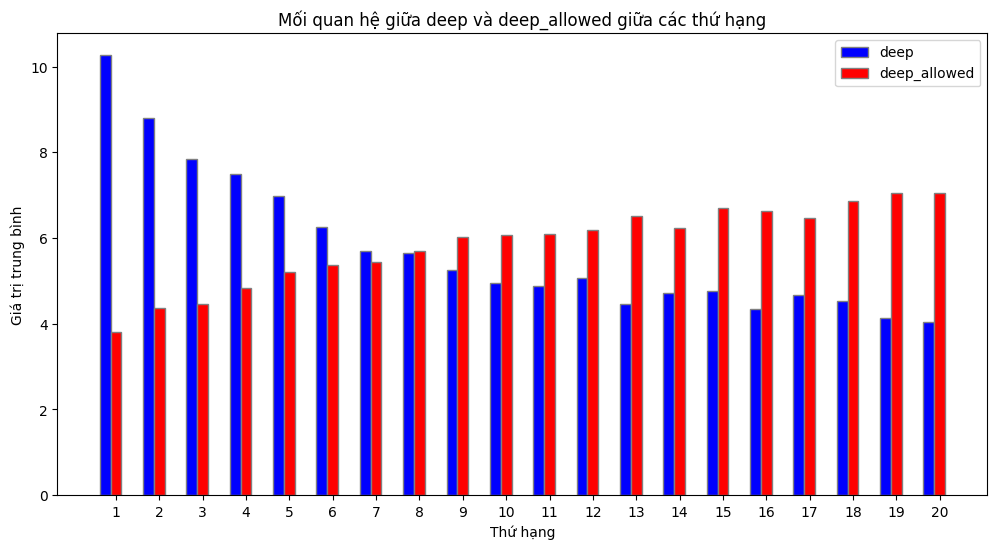

In [ ]:
barWidth = 0.25
r1 = np.arange(len(position_stats['position']))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(12, 6))
plt.bar(r1, position_stats['deep'], color='blue', width=barWidth, edgecolor='grey', label='deep')
plt.bar(r2, position_stats['deep_allowed'], color='red', width=barWidth, edgecolor='grey', label='deep_allowed')
plt.title('Mối quan hệ giữa deep và deep_allowed giữa các thứ hạng')
plt.xlabel('Thứ hạng')
plt.ylabel('Giá trị trung bình')
plt.xticks([r + barWidth for r in range(len(position_stats['position']))], position_stats['position'])
plt.legend()
plt.show()

**Nhận xét**
- Các đội ở vị trí cao hơn trên bảng xếp hạng (top 1 đến 4) có giá trị trung bình của chỉ số deep cao hơn hẳn so với các đội ở nhóm cuối (vị trí 17-20). Điều này cho thấy các đội mạnh hơn thường tạo được nhiều tình huống nguy hiểm ở khu vực 1/3 cuối sân của đối phương.
- Ngược lại, các đội ở cuối bảng xếp hạng có giá trị deep_allowed cao hơn, tức là họ để đối thủ xâm nhập khu vực 1/3 cuối sân của mình nhiều hơn. Điều này phản ánh khả năng phòng ngự yếu kém của họ.
- Các đội ở giữa bảng xếp hạng (vị trí 7-14) có sự cân bằng hơn giữa chỉ số deep và deep_allowed. Điều này cho thấy họ có khả năng tấn công và phòng ngự ở mức trung bình, không quá vượt trội nhưng cũng không yếu kém.

**Nhận xét**

## Câu 11: Các chỉ số ppda_def và ppda_at, oppda_def và oppda_att liên quan đến quá trình phòng thủ và tấn công ảnh hướng thế nào đến thứ hạng cuối cùng

**Ý nghĩa của câu hỏi**

Câu hỏi này nhằm tìm hiểu mối quan hệ giữa các chỉ số PPDA_def, PPDA_att, OPPDA_def, và OPPDA_att với thứ hạng cuối cùng của các đội bóng trong mùa giải.

**Lợi ích khi trả lời câu hỏi**

Các huấn luyện viên có thể sử dụng phân tích này để cải thiện chiến thuật của đội bóng. Nếu đội phòng ngự kém (PPDA_def cao) hoặc tấn công yếu (PPDA_att thấp), họ có thể điều chỉnh chiến thuật để cải thiện thứ hạng cuối cùng trong bảng xếp hạng.

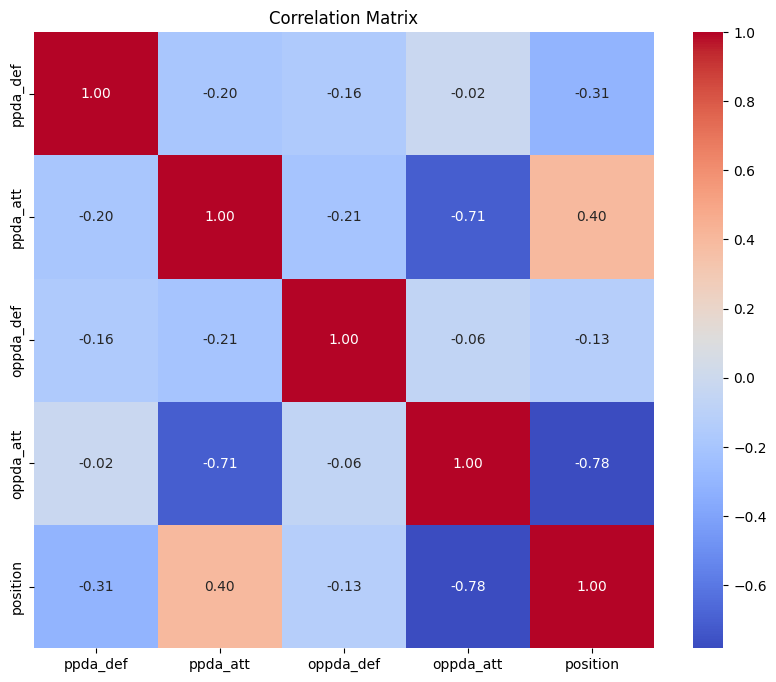

In [ ]:
corr_data = merged_data[['ppda_def', 'ppda_att', 'oppda_def', 'oppda_att', 'position']].corr()
correlation_matrix = corr_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
position_stats1 = merged_data.groupby('position')[['ppda_def', 'ppda_att', 'oppda_def', 'oppda_att']].mean().reset_index()
position_stats1

position   ppda_def    ppda_att  oppda_def   oppda_att
0          1  24.893385  198.866148  23.181323  337.329961
1          2  25.413686  218.732504  23.453344  306.153966
2          3  25.468896  216.749611  24.749611  285.974339
3          4  25.364697  213.509331  24.697512  282.355365
4          5  25.020995  224.706843  24.139191  271.531882
5          6  24.563764  227.437014  24.538103  251.625972
6          7  24.676516  236.944012  24.037325  236.862364
7          8  24.867704  235.873152  24.797665  241.140856
8          9  23.586770  237.635798  24.101946  232.502724
9         10  24.391440  246.440467  24.617121  218.273152
10        11  24.302181  241.774922  24.982087  224.052181
11        12  23.817899  247.924514  24.684825  213.573541
12        13  23.370140  259.229393  24.578538  209.538103
13        14  24.141524  253.968896  24.287714  203.940902
14        15  23.660700  253.129183  24.396887  221.890272
15        16  23.385214  255.436576  24.125292  207.786770
16        17  24.691403  251.346606  24.302262  203.141176
17        18  23.881448  265.984615  24.370136  204.764706
18        19  23.675166  266.332594  24.256098  201.590909
19        20  23.276360  259.531632  24.798002  207.049945

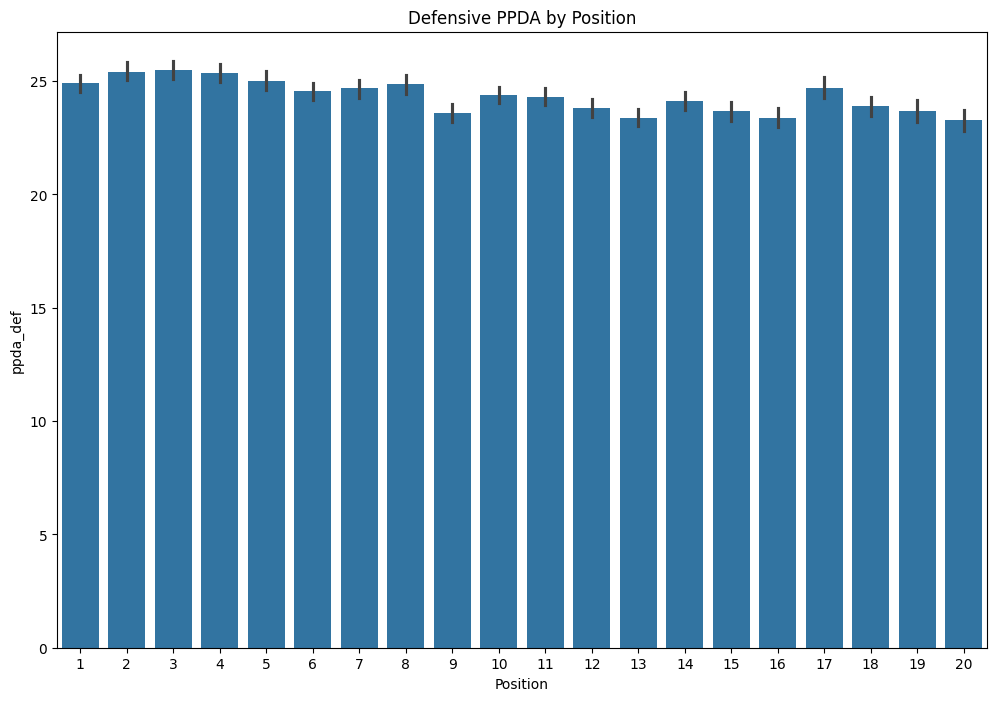

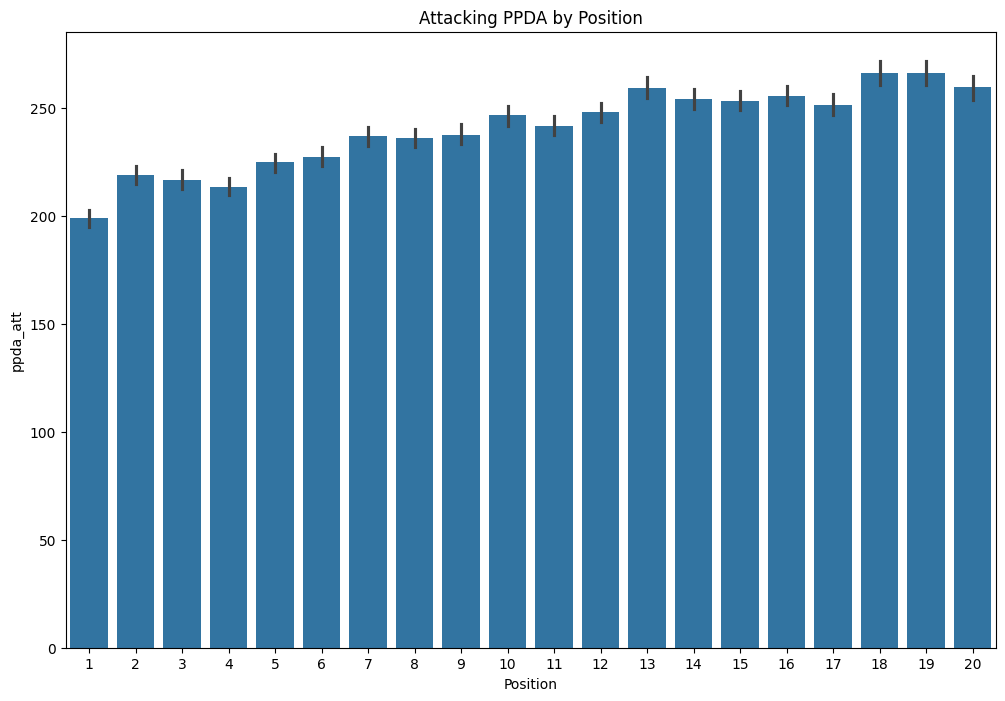

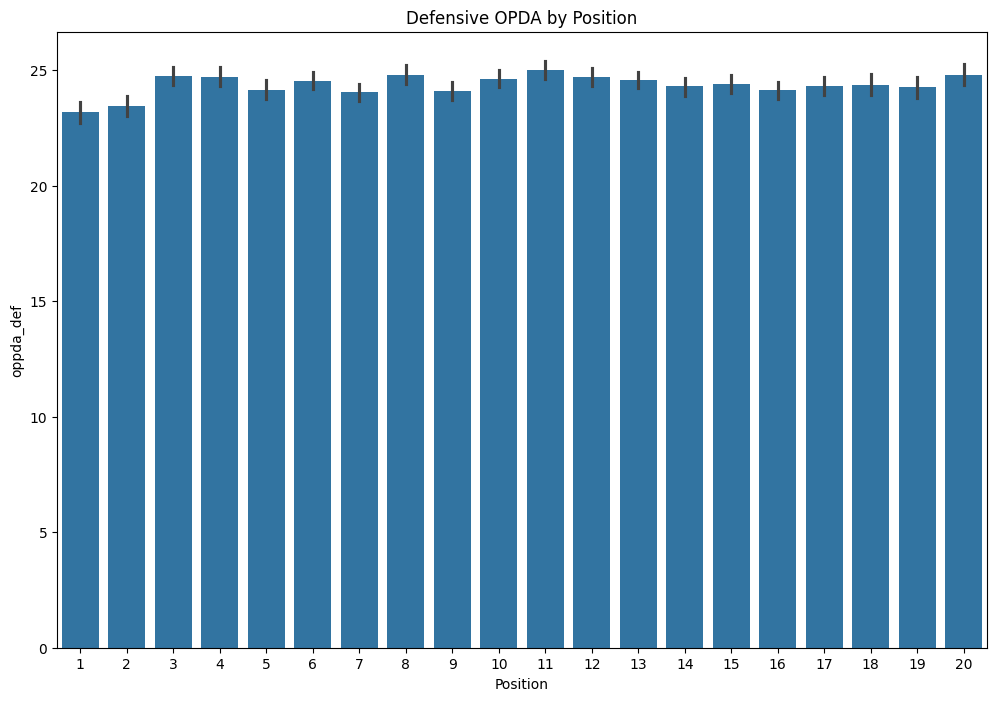

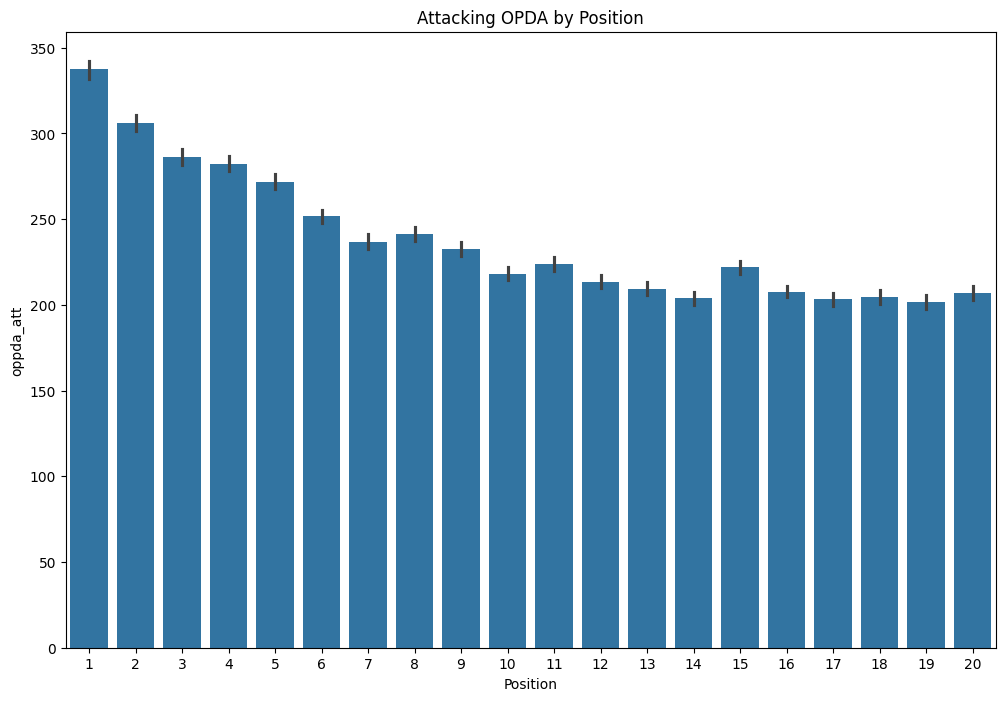

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=merged_data, x="position", y="ppda_def", legend=False)
plt.title('Defensive PPDA by Position')
plt.xlabel('Position')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=merged_data, x="position", y="ppda_att", legend=False)
plt.title('Attacking PPDA by Position')
plt.xlabel('Position')
plt.show

plt.figure(figsize=(12, 8))
sns.barplot(data=merged_data, x="position", y="oppda_def", legend=False)
plt.title('Defensive OPDA by Position')
plt.xlabel('Position')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=merged_data, x="position", y="oppda_att", legend=False)
plt.title('Attacking OPDA by Position')
plt.xlabel('Position')
plt.show()

**Nhận xét**

## Câu 12: Các chỉ số PPDA_def, PPDA_att, OPPDA_def, OPPDA_att có tương quan như thế nào với kết quả trận đấu (thắng, hòa, thua)?

**Ý nghĩa của câu hỏi**

Câu hỏi này nhằm khám phá mối quan hệ giữa các chỉ số PPDA_def, PPDA_att, OPPDA_def, OPPDA_att và kết quả trận đấu (thắng, hòa, thua). Các chỉ số này đo lường các yếu tố quan trọng trong chiến thuật phòng ngự và tấn công của đội bóng

**Lợi ích khi trả lời câu hỏi**

- Bằng việc phân tích các chỉ số này, bạn có thể hiểu rõ hơn về cách các đội bóng thực hiện chiến thuật tấn công và phòng ngự trong trận đấu và liệu những chiến thuật này có ảnh hưởng tích cực hay tiêu cực đến kết quả trận đấu (thắng, hòa, thua).
Đánh giá khả năng phòng ngự và tấn công của đội bóng:

- Các chỉ số như PPDA_def, OPPDA_def cho thấy khả năng phòng ngự của đội, trong khi PPDA_att và OPPDA_att cho thấy khả năng tấn công. Hiểu được mối quan hệ giữa các chỉ số này và kết quả trận đấu có thể giúp đánh giá khả năng thi đấu tổng thể của đội bóng, cả khi phòng ngự và tấn công.

In [ ]:
ppda_stats = df_details.groupby('result')[['ppda_def', 'ppda_att', 'oppda_def', 'oppda_att']].mean().reset_index()
ppda_stats

result   ppda_def    ppda_att  oppda_def   oppda_att
0      d  24.357143  230.752177  24.357143  230.752177
1      l  23.947764  253.382740  24.746327  231.821961
2      w  24.746327  231.821961  23.947764  253.382740

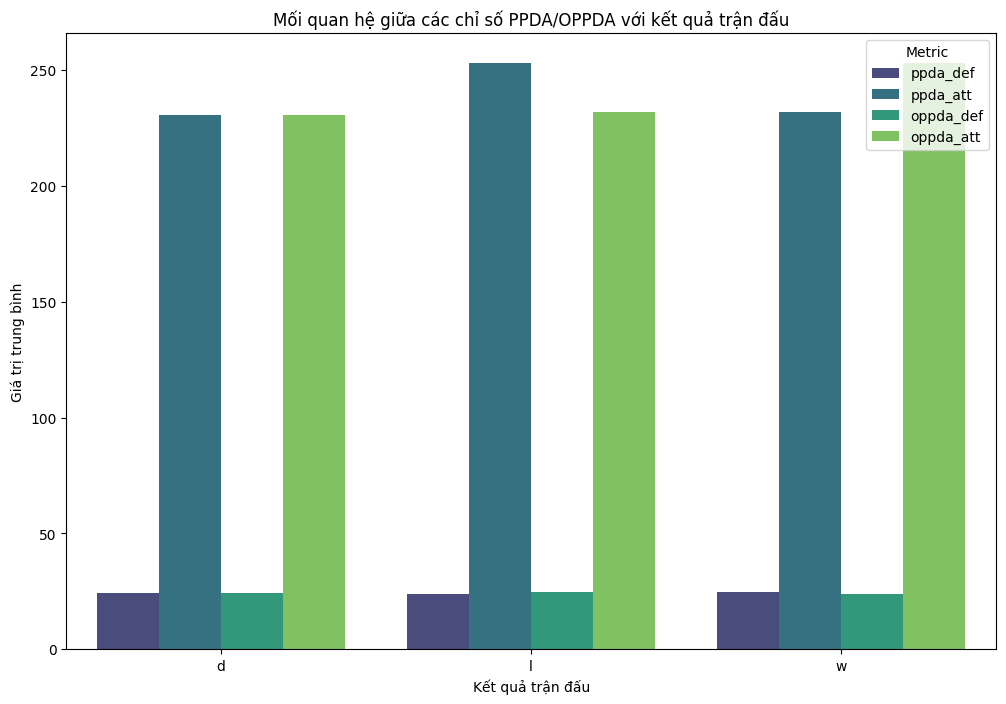

In [ ]:
ppda_stats_melted = pd.melt(ppda_stats, id_vars=['result'], value_vars=['ppda_def', 'ppda_att', 'oppda_def', 'oppda_att'],
                             var_name='Metric', value_name='Average Value')
plt.figure(figsize=(12, 8))
sns.barplot(x='result', y='Average Value', hue='Metric', data=ppda_stats_melted, palette='viridis')
plt.title('Mối quan hệ giữa các chỉ số PPDA/OPPDA với kết quả trận đấu')
plt.xlabel('Kết quả trận đấu')
plt.ylabel('Giá trị trung bình')
plt.show()

**Nhận xét**
- Giá trị PPDA_def thấp hơn khi đội thắng trận (w), cho thấy rằng các đội bóng có khả năng pressing hiệu quả hơn trong phòng ngự thường giành chiến thắng.
- Giá trị PPDA_att không thay đổi nhiều giữa các kết quả trận đấu (w, d, l). Điều này cho thấy rằng tấn công pressing không phải là yếu tố quyết định trực tiếp đến kết quả, mà sự hiệu quả của pressing trong phòng ngự (PPDA_def) quan trọng hơn.
- Trong các trận thua (l), giá trị OPPDA_def cao hơn, cho thấy họ chịu sức ép từ pressing của đối thủ nhiều hơn.
- Chỉ số OPPDA_att không thay đổi đáng kể giữa các kết quả (w, d, l), tương tự như PPDA_att. Điều này có thể là do pressing trong tấn công không có vai trò rõ ràng trong quyết định thắng hay thua.

## Câu 13: Mối quan hệ giữa số điểm thực tế (PTS) và số điểm kỳ vọng (xPTS) là gì? Top 10 đội bóng của năm gần đây nhất theo mùa giải được kỳ vọng và họ thể hiện thế nào?

**Ý nghĩa của câu hỏi**

Câu hỏi này giúp bạn phân tích sự khác biệt giữa điểm thực tế và điểm kỳ vọng của các đội bóng.
- Nếu PTS > xPTS, có thể là đội bóng đó có thành tích vượt trội
- Nếu PTS < xPTS, đội bóng đó có thể chưa tận dụng hết cơ hội và phòng ngự chưa tốt.

Việc xem xét các đội bóng hàng đầu trong mùa giải gần nhất và so sánh hiệu suất thực tế (PTS) với kỳ vọng (xPTS) sẽ giúp bạn đánh giá xem liệu các đội này đã tận dụng hết khả năng của mình hay không và liệu họ có đạt được thành tích thực tế vượt xa kỳ vọng không.

**Lợi ích khi trả lời câu hỏi**
Câu hỏi này cung cấp cái nhìn về sự khác biệt giữa kết quả thực tế của các đội và những gì được dự đoán từ các chỉ số kỳ vọng. Nó giúp bạn phân tích các đội vượt qua kỳ vọng hoặc kém hơn so với kỳ vọng.

Để dễ dàng quan sát, nếu 1 đội có pts > xpts, thêm cột performance và nó là best performance và ngựoc lại là poor performance


In [ ]:
df_overview['performance'] = np.where(df_overview['pts'] > df_overview['xpts'], 'best performance', 'poor performance')
df_overview[['team', 'pts', 'xpts', 'xpts_diff', 'performance']]

team  pts     xpts  xpts_diff       performance
0                Barcelona   94  94.0813     0.0813  poor performance
1              Real Madrid   92  81.7489   -10.2511  best performance
2          Atletico Madrid   78  73.1353    -4.8647  best performance
3                 Valencia   77  63.7068   -13.2932  best performance
4                  Sevilla   76  67.3867    -8.6133  best performance
..                     ...  ...      ...        ...               ...
679              PFC Sochi   33  38.6587     5.6587  poor performance
680              FK Akhmat   31  36.5424     5.5424  poor performance
681  Krylya Sovetov Samara   31  36.3363     5.3363  poor performance
682              FC Tambov   31  29.2413    -1.7587  best performance
683            FC Orenburg   27  39.2364    12.2364  poor performance

[684 rows x 5 columns]

In [ ]:
latest_year = df_overview['year'].max()
top_10_teams_latest_season = df_overview[
       (df_overview['year'] == latest_year) & (df_overview['position'] <= 10)
   ]
top_10_teams_latest_season[['league', 'team', 'position', 'pts', 'xpts', 'performance']]

league                     team  position  pts     xpts  \
100     La_liga              Real Madrid         1   87  77.6868   
101     La_liga                Barcelona         2   82  73.1381   
102     La_liga                  Sevilla         3   70  65.7050   
103     La_liga          Atletico Madrid         4   70  72.3506   
104     La_liga               Villarreal         5   60  64.0527   
105     La_liga            Real Sociedad         6   56  57.1783   
106     La_liga                  Granada         7   56  52.5969   
107     La_liga                   Getafe         8   54  53.7878   
108     La_liga                 Valencia         9   53  45.4291   
109     La_liga                  Osasuna        10   52  51.5097   
220         EPL                Liverpool         1   99  74.2784   
221         EPL          Manchester City         2   81  86.7564   
222         EPL        Manchester United         3   66  70.9917   
223         EPL                  Chelsea         4   66  73.4872   
224         EPL                Leicester         5   62  61.1553   
225         EPL                Tottenham         6   59  49.2646   
226         EPL  Wolverhampton Wanderers         7   59  63.8213   
227         EPL                  Arsenal         8   56  50.1471   
228         EPL                  Burnley         9   54  49.5405   
229         EPL         Sheffield United        10   54  49.3411   
330  Bundesliga            Bayern Munich         1   82  77.3257   
331  Bundesliga        Borussia Dortmund         2   69  62.4827   
332  Bundesliga   RasenBallsport Leipzig         3   66  68.7067   
333  Bundesliga      Borussia M.Gladbach         4   65  62.6315   
334  Bundesliga         Bayer Leverkusen         5   63  54.6178   
335  Bundesliga               Hoffenheim         6   52  45.8749   
336  Bundesliga                Wolfsburg         7   49  55.6943   
337  Bundesliga                 Freiburg         8   48  39.1515   
338  Bundesliga      Eintracht Frankfurt         9   45  52.7225   
339  Bundesliga            Hertha Berlin        10   41  39.5544   
448     Serie_A                 Juventus         1   83  71.2394   
449     Serie_A                    Inter         2   82  75.3771   
450     Serie_A                    Lazio         3   78  62.1830   
451     Serie_A                 Atalanta         4   78  76.0125   
452     Serie_A                     Roma         5   70  70.2617   
453     Serie_A                 AC Milan         6   66  65.4665   
454     Serie_A                   Napoli         7   62  66.4911   
455     Serie_A                 Sassuolo         8   51  45.5987   
456     Serie_A                   Verona         9   49  48.8992   
457     Serie_A               Fiorentina        10   46  52.5691   
568     Ligue_1      Paris Saint Germain         1   68  65.6794   
569     Ligue_1                Marseille         2   56  41.7319   
570     Ligue_1                   Rennes         3   50  41.1761   
571     Ligue_1                    Lille         4   49  47.1188   
572     Ligue_1                     Nice         5   41  35.6196   
573     Ligue_1                    Reims         6   41  40.4213   
574     Ligue_1              Montpellier         7   40  40.0550   
575     Ligue_1                   Monaco         8   40  42.4661   
576     Ligue_1                     Lyon         9   40  46.3375   
577     Ligue_1                   Angers        10   39  37.4895   
668        RFPL     Zenit St. Petersburg         1   72  63.7522   
669        RFPL         Lokomotiv Moscow         2   57  52.0032   
670        RFPL             FC Krasnodar         3   52  48.8261   
671        RFPL              CSKA Moscow         4   50  45.8074   
672        RFPL                FC Rostov         5   45  41.6821   
673        RFPL            Dinamo Moscow         6   41  46.0324   
674        RFPL           Spartak Moscow         7   39  46.3068   
675        RFPL                   FC Ufa         8   38  32.8336 

**Nhận xét**

## Câu 14: Số lượng performance được phân bố như thế nào?

**Ý nghĩa của câu hỏi**

Câu hỏi này giúp bạn tìm hiểu cách thức phân bổ performance (hiệu suất) của các đội bóng qua các mùa giải và giải đấu. Bằng cách phân tích sự phân bố này, bạn sẽ có cái nhìn sâu sắc về các đội bóng có xu hướng vượt kỳ vọng, các đội thi đấu kém hơn so với kỳ vọng và những đội bóng có phong độ ổn định.

**Lợi ích khi trả lời câu hỏi**

Câu hỏi này giúp bạn hiểu rõ hơn về sự thay đổi phong độ của các đội bóng qua từng mùa giải và trong các giải đấu khác nhau. Việc phân bố số lượng performance (best/poor) qua từng mùa hoặc giải đấu sẽ cho thấy liệu các đội bóng có xu hướng cải thiện, duy trì, hay giảm sút hiệu suất theo thời gian.

### Qua từng mùa giải

In [ ]:
performance_by_season = df_overview.groupby(['year', 'performance'])['team'].count().reset_index()
performance_by_season

year       performance  team
0   2014  best performance    54
1   2014  poor performance    60
2   2015  best performance    57
3   2015  poor performance    57
4   2016  best performance    59
5   2016  poor performance    55
6   2017  best performance    54
7   2017  poor performance    60
8   2018  best performance    55
9   2018  poor performance    59
10  2019  best performance    60
11  2019  poor performance    54

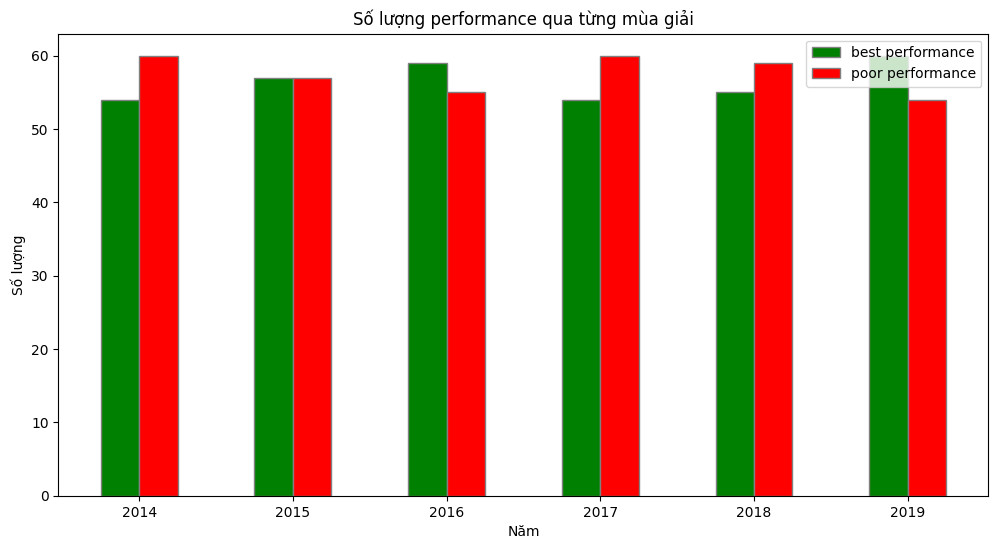

In [ ]:
barWidth = 0.25
years = performance_by_season['year'].unique()
num_years = len(years)

r1 = np.arange(num_years)
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(12, 6))

best_performance = performance_by_season[performance_by_season['performance'] == 'best performance'].groupby('year')['team'].sum().reindex(years, fill_value=0)
poor_performance = performance_by_season[performance_by_season['performance'] == 'poor performance'].groupby('year')['team'].sum().reindex(years, fill_value=0)

plt.bar(r1, best_performance, color='green', width=barWidth, edgecolor='grey', label='best performance')
plt.bar(r2, poor_performance, color='red', width=barWidth, edgecolor='grey', label='poor performance')

plt.title('Số lượng performance qua từng mùa giải')
plt.xlabel('Năm')
plt.ylabel('Số lượng')

plt.xticks([r + barWidth/2 for r in range(num_years)], years) # Center ticks between bars
plt.legend()
plt.show()

**Nhận xét**
- Trong các mùa giải từ 2014 đến 2019, số lượng các trận được xếp vào nhóm "poor performance" (màu đỏ) luôn nhỉnh hơn hoặc ngang bằng số lượng trận thuộc nhóm "best performance" (màu xanh), trừ hai năm 2016 và 2019.
Mùa giải 2014 và 2017 có sự chênh lệch lớn nhất giữa hai loại performance, với "poor performance" vượt trội hơn đáng kể.
- Từ 2016 đến 2019, số lượng "best performance" tăng nhẹ, nhưng không rõ rệ

**Nhận xét**

### Qua từng giải đấu

In [ ]:
performance_by_league = df_overview.groupby(['league', 'performance'])['team'].count().reset_index()
performance_by_league

league       performance  team
0   Bundesliga  best performance    54
1   Bundesliga  poor performance    54
2          EPL  best performance    52
3          EPL  poor performance    68
4      La_liga  best performance    57
5      La_liga  poor performance    63
6      Ligue_1  best performance    62
7      Ligue_1  poor performance    58
8         RFPL  best performance    48
9         RFPL  poor performance    48
10     Serie_A  best performance    66
11     Serie_A  poor performance    54

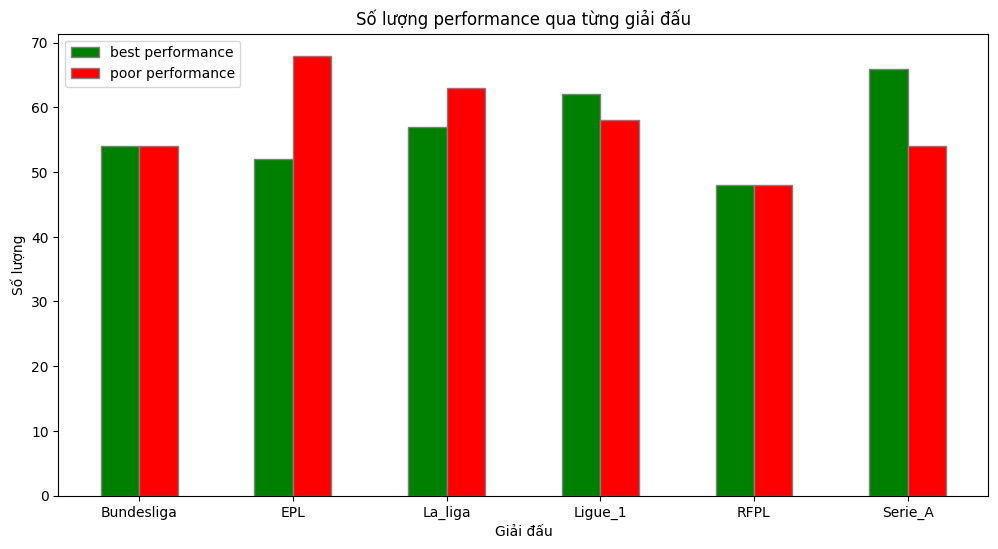

In [ ]:
barWidth = 0.25
leagues = performance_by_league['league'].unique()

r1 = np.arange(len(leagues))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(12, 6))

best_performance = performance_by_league[performance_by_league['performance'] == 'best performance'].groupby('league')['team'].sum().reindex(leagues, fill_value=0)
poor_performance = performance_by_league[performance_by_league['performance'] == 'poor performance'].groupby('league')['team'].sum().reindex(leagues, fill_value=0)

plt.bar(r1, best_performance, color='green', width=barWidth, edgecolor='grey', label='best performance')
plt.bar(r2, poor_performance, color='red', width=barWidth, edgecolor='grey', label='poor performance')

plt.title('Số lượng performance qua từng giải đấu')
plt.xlabel('Giải đấu')
plt.ylabel('Số lượng')

plt.xticks([r + barWidth/2 for r in range(len(leagues))], leagues) # Center ticks between bars
plt.legend()
plt.show()
